# Corre todo de nuevo, pon comentarios faltantes y revisa en general para que lo pases en limpio y los archivos que faltan por guardarse limpios

In [1]:
#Importamos las librerías con las que trabajaremos
import pandas as pd

In [2]:
#Ahora tomamos una parte de los datasets
acc_int_fijo = pd.read_csv('Datasets/Obligatorios/AccesosaInternetfijoportecnologiaylocalidad_2791751688431884784.csv')

In [3]:
#Vemos solo un poco de los datos, para ver columnas y contenido
acc_int_fijo.head(2)

Provincia     Partido   Localidad Link Indec ADSL CABLEMODEM DIAL UP   
0  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100  873      4.704     - 0  \
1  BUENOS AIRES  25 de Mayo   Del Valle    6854020  181        - 0     - 0   

  FIBRA OPTICA OTROS SATELITAL WIMAX WIRELESS Total general  Unnamed: 13  
0            2   - 0       975   - 0      664         7.218          NaN  
1          - 0    10         1   - 0      - 0           192          NaN

In [4]:
#Intentamos tener un análisis básico
acc_int_fijo.describe()

Unnamed: 13
count          0.0
mean           NaN
std            NaN
min            NaN
25%            NaN
50%            NaN
75%            NaN
max            NaN

Al solo tomar una parte de los datos, intuimos que hay columnas con datos que no son correctos, entonces debemos realizar alguna modificación

In [5]:
#Veamos los datos
acc_int_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


Como vemos, son de tipo object, así que no nos permitirá realizar muchas cosas, debemos cambiarlos al tipo correcto

In [6]:
#Comenzamos con los string
acc_int_fijo['Localidad'] = acc_int_fijo[['Localidad']].astype('string')
acc_int_fijo['Provincia'] = acc_int_fijo[['Provincia']].astype('string')
acc_int_fijo['Partido'] = acc_int_fijo[['Partido']].astype('string')

In [7]:
#Confirmamos los cambios
acc_int_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   string 
 1   Partido        3142 non-null   string 
 2   Localidad      3142 non-null   string 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(10), string(3)
memory usage: 343.8+ KB


In [8]:
#Ahora cambiamos los numéricos
acc_int_fijo['Link Indec'] = acc_int_fijo[['Link Indec']].astype(int)
acc_int_fijo['ADSL'] = acc_int_fijo[['ADSL']].astype(int)
acc_int_fijo['DIAL UP'] = acc_int_fijo[['DIAL UP']].astype(int)
acc_int_fijo['FIBRA OPTICA'] = acc_int_fijo[['FIBRA OPTICA']].astype(int)
acc_int_fijo['OTROS'] = acc_int_fijo[['OTROS']].astype(int)
acc_int_fijo['SATELITAL'] = acc_int_fijo[['SATELITAL']].astype(int)
acc_int_fijo['WIMAX'] = acc_int_fijo[['WIMAX']].astype(int)
acc_int_fijo['WIRELESS'] = acc_int_fijo[['WIRELESS']].astype(int)
acc_int_fijo['CABLEMODEM'] = acc_int_fijo[['CABLEMODEM']].astype(float)
acc_int_fijo['Total general'] = acc_int_fijo[['Total general']].astype(float)

ValueError: invalid literal for int() with base 10: 'Sin Datos'

Como podemos ver, hay un error en una de las columnas, hay un dato de tipo string que impide que podamos realizar el cambio, entonces revisamos los datos para confirmar el error y realizar los cambios necesarios.

In [9]:
acc_int_fijo['Link Indec'].tail(23)

3119     90070090
3120    Sin Datos
3121     90077010
3122     90077020
3123     90077040
3124     90091050
3125     90091010
3126     90091020
3127     90091030
3128     90091060
3129     90098010
3130     90098020
3131     90098030
3132     90098040
3133     90105020
3134     90105030
3135     90105080
3136     90105060
3137     90105100
3138     90112020
3139     90112030
3140     90119020
3141     90119030
Name: Link Indec, dtype: object

In [10]:
#Al confirmar el error, reemplazamos los datos entonces
acc_int_fijo['Link Indec'].replace('Sin Datos', '0', inplace=True)

In [11]:
#Vemos el cambio
acc_int_fijo['Link Indec'].tail(23)

3119    90070090
3120           0
3121    90077010
3122    90077020
3123    90077040
3124    90091050
3125    90091010
3126    90091020
3127    90091030
3128    90091060
3129    90098010
3130    90098020
3131    90098030
3132    90098040
3133    90105020
3134    90105030
3135    90105080
3136    90105060
3137    90105100
3138    90112020
3139    90112030
3140    90119020
3141    90119030
Name: Link Indec, dtype: object

In [12]:
#Ahora si hacemos el cambio de tipo de dato
acc_int_fijo['Link Indec'] = acc_int_fijo[['Link Indec']].astype(int)

In [13]:
#Vemos el cambio
acc_int_fijo['Link Indec'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3142 entries, 0 to 3141
Series name: Link Indec
Non-Null Count  Dtype
--------------  -----
3142 non-null   int64
dtypes: int64(1)
memory usage: 24.7 KB


In [91]:
#acces_tech_uno['ADSL'] = acces_tech_uno['ADSL'].replace('\.', '', regex=True)
acc_int_fijo['Link Indec'].describe()

count    3.142000e+03
mean     3.886691e+07
std      2.971653e+07
min      0.000000e+00
25%      1.003503e+07
50%      3.011308e+07
75%      6.610503e+07
max      9.401402e+07
Name: Link Indec, dtype: float64

In [14]:
#Vemos los demás, vamos uno a uno
acc_int_fijo['ADSL'] = acc_int_fijo[['ADSL']].astype(int)

ValueError: invalid literal for int() with base 10: '- 0'

Al hacer el cambio directamente como antes, se cambia toda la columna, entonces la copiaremos para probar los cambios.

In [15]:
#Asignamos a una variable los valores de la columna
adsl = acc_int_fijo['ADSL']

In [16]:
#Vemos los datos, para confirmar se hayan hecho los cambios
adsl.head()

0    873
1    181
2    - 0
3    - 0
4    - 0
Name: ADSL, dtype: object

In [17]:
#Cambiamos los valores
adsl = adsl.replace('- 0', '0', inplace=True)

In [18]:
#De nuevo cambiamos el tipo de dato
acc_int_fijo['ADSL'] = acc_int_fijo['ADSL'].astype('float')

In [19]:
#Vemos el cambio
acc_int_fijo['ADSL'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3142 entries, 0 to 3141
Series name: ADSL
Non-Null Count  Dtype  
--------------  -----  
3142 non-null   float64
dtypes: float64(1)
memory usage: 24.7 KB


Continuamos con las demás columas.

In [20]:
#Continuamos con la siguiente columna
acc_int_fijo['DIAL UP'] = acc_int_fijo[['DIAL UP']].astype(int)

ValueError: invalid literal for int() with base 10: '- 0'

De nuevo el error, hacemos lo mismo que con la columna anterior.

In [21]:
dial = acc_int_fijo['DIAL UP']

In [22]:
dial.head()

0    - 0
1    - 0
2    - 0
3    - 0
4    - 0
Name: DIAL UP, dtype: object

In [23]:
dial.tail()

3137    - 0
3138    - 0
3139    - 0
3140    - 0
3141    - 0
Name: DIAL UP, dtype: object

In [24]:
dial = dial.replace('- 0', '0', inplace=True)

In [25]:
acc_int_fijo['DIAL UP'].head(10)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8    82
9     0
Name: DIAL UP, dtype: object

Con esto queda cambiado el tipo de dato, ahora si podemos hacer el cambio de tipo de dato.

In [26]:
#En este caso, realizamos el cambio a tipo 'float', ya que apareció
#un error, ya que hay elementos con decimales, así que indicamos
#el tipo de dato correcto
acc_int_fijo['DIAL UP'] = acc_int_fijo['DIAL UP'].astype('float')

In [27]:
#Vemos el resultado
acc_int_fijo['DIAL UP'].head(10)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8    82.0
9     0.0
Name: DIAL UP, dtype: float64

Siguiente columna.

In [28]:
#como siempre, intentamos hacer el cambio directamente
acc_int_fijo['FIBRA OPTICA'] = acc_int_fijo[['FIBRA OPTICA']].astype(int)

ValueError: invalid literal for int() with base 10: '- 0'

In [29]:
fibra = acc_int_fijo['FIBRA OPTICA']

In [30]:
fibra.head()

0      2
1    - 0
2    - 0
3      6
4    - 0
Name: FIBRA OPTICA, dtype: object

In [31]:
#Hacemos el cambio
fibra = acc_int_fijo['FIBRA OPTICA'].replace('- 0', '0', inplace=True)

In [32]:
#Revisamos si se realizó correctamente
acc_int_fijo['FIBRA OPTICA'].head()

0    2
1    0
2    0
3    6
4    0
Name: FIBRA OPTICA, dtype: object

In [33]:
#De nuevo, cambiamos el tipo de dato
acc_int_fijo['FIBRA OPTICA'] = acc_int_fijo['FIBRA OPTICA'].astype('int64')

ValueError: invalid literal for int() with base 10: '5.886'

In [34]:
#Vemos el error que aparece arriba, el mismo que la columna anterior, 
#lo modificamos
acc_int_fijo['FIBRA OPTICA'] = acc_int_fijo['FIBRA OPTICA'].astype('float')

In [35]:
#Confirmamos el cambio
acc_int_fijo['FIBRA OPTICA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3142 entries, 0 to 3141
Series name: FIBRA OPTICA
Non-Null Count  Dtype  
--------------  -----  
3142 non-null   float64
dtypes: float64(1)
memory usage: 24.7 KB


Continuamos con los cambios.

In [36]:
#De nuevo el error, cambiamos como antes
acc_int_fijo['OTROS'] = acc_int_fijo[['OTROS']].astype(int)

ValueError: invalid literal for int() with base 10: '- 0'

In [37]:
otros = acc_int_fijo['OTROS']

In [38]:
otros = otros.replace('- 0', '0', inplace=True)

In [39]:
acc_int_fijo['OTROS'].head()

0      0
1     10
2      0
3    167
4      0
Name: OTROS, dtype: object

Aparece el mismo error, debe ser float, así que realizamos el cambio.

In [40]:
acc_int_fijo['OTROS'] = acc_int_fijo['OTROS'].astype('float')

In [41]:
acc_int_fijo['OTROS'].head()

0      0.0
1     10.0
2      0.0
3    167.0
4      0.0
Name: OTROS, dtype: float64

Seguimos con la siguiente columna.

In [42]:
resto = acc_int_fijo['SATELITAL']

In [43]:
acc_int_fijo['SATELITAL'].head()

0    975
1      1
2    - 0
3    - 0
4    - 0
Name: SATELITAL, dtype: object

In [44]:
resto = resto.replace('- 0', '0', inplace=True)

In [45]:
acc_int_fijo[['SATELITAL']].head()

SATELITAL
0       975
1         1
2         0
3         0
4         0

In [46]:
acc_int_fijo['SATELITAL'] = acc_int_fijo['SATELITAL'].astype('int64')

In [47]:
acc_int_fijo['SATELITAL'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3142 entries, 0 to 3141
Series name: SATELITAL
Non-Null Count  Dtype
--------------  -----
3142 non-null   int64
dtypes: int64(1)
memory usage: 24.7 KB


Seguimos.

In [50]:
resto = acc_int_fijo['WIMAX']

In [51]:
resto.head()

0    - 0
1    - 0
2    - 0
3    - 0
4    - 0
Name: WIMAX, dtype: object

In [52]:
resto = resto.replace('- 0', '0', inplace=True)

In [53]:
acc_int_fijo['WIMAX'].head()

0    0
1    0
2    0
3    0
4    0
Name: WIMAX, dtype: object

In [54]:
acc_int_fijo['WIMAX'] = acc_int_fijo['WIMAX'].astype('int64')

In [55]:
acc_int_fijo['WIMAX'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3142 entries, 0 to 3141
Series name: WIMAX
Non-Null Count  Dtype
--------------  -----
3142 non-null   int64
dtypes: int64(1)
memory usage: 24.7 KB


La siguiente columna es WIRELESS

In [56]:
resto = acc_int_fijo['WIRELESS']

In [57]:
resto.head()

0    664
1    - 0
2    181
3    327
4      6
Name: WIRELESS, dtype: object

In [58]:
resto = resto.replace('- 0', '0', inplace=True)

In [59]:
acc_int_fijo['WIRELESS'].head()

0    664
1      0
2    181
3    327
4      6
Name: WIRELESS, dtype: object

In [60]:
acc_int_fijo['WIRELESS'] = acc_int_fijo['WIRELESS'].astype('float')

In [61]:
acc_int_fijo['WIRELESS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3142 entries, 0 to 3141
Series name: WIRELESS
Non-Null Count  Dtype  
--------------  -----  
3142 non-null   float64
dtypes: float64(1)
memory usage: 24.7 KB


Seguimos con CABLEMODEM

In [62]:
resto = acc_int_fijo['CABLEMODEM']
resto = resto.replace('- 0', '0', inplace=True)

In [63]:
acc_int_fijo['CABLEMODEM'].head()

0    4.704
1        0
2        0
3      782
4        0
Name: CABLEMODEM, dtype: object

In [64]:
acc_int_fijo['CABLEMODEM'] = acc_int_fijo['CABLEMODEM'].astype('float')

ValueError: could not convert string to float: '1.240.125'

In [65]:
resto = acc_int_fijo['CABLEMODEM']

In [66]:
#En esta transformación sale ese error, lo reemplazamos
resto = resto.replace('1.240.125', '1240125', inplace=True)

In [67]:
acc_int_fijo['CABLEMODEM'] = acc_int_fijo[['CABLEMODEM']].astype('float')

In [68]:
acc_int_fijo['CABLEMODEM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3142 entries, 0 to 3141
Series name: CABLEMODEM
Non-Null Count  Dtype  
--------------  -----  
3142 non-null   float64
dtypes: float64(1)
memory usage: 24.7 KB


Ahora con Total general

In [69]:
acc_int_fijo['Total general'] = acc_int_fijo[['Total general']].astype('float')

ValueError: could not convert string to float: '1.547.679'

In [70]:
resto = acc_int_fijo['Total general']

In [71]:
resto = resto.replace('1.547.679', '1547679', inplace=True)

In [72]:
acc_int_fijo['Total general'] = acc_int_fijo['Total general'].astype('float')

ValueError: could not convert string to float: '- 0'

In [73]:
resto = acc_int_fijo['Total general']

In [74]:
acc_int_fijo['Total general'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3142 entries, 0 to 3141
Series name: Total general
Non-Null Count  Dtype 
--------------  ----- 
3142 non-null   object
dtypes: object(1)
memory usage: 24.7+ KB


In [75]:
resto = resto.replace('- 0', '0', inplace=True)

In [76]:
acc_int_fijo['Total general'] = acc_int_fijo['Total general'].astype('float')

In [77]:
#Vemos el resultado final de todo el dataset
acc_int_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   string 
 1   Partido        3142 non-null   string 
 2   Localidad      3142 non-null   string 
 3   Link Indec     3142 non-null   int64  
 4   ADSL           3142 non-null   float64
 5   CABLEMODEM     3142 non-null   float64
 6   DIAL UP        3142 non-null   float64
 7   FIBRA OPTICA   3142 non-null   float64
 8   OTROS          3142 non-null   float64
 9   SATELITAL      3142 non-null   int64  
 10  WIMAX          3142 non-null   int64  
 11  WIRELESS       3142 non-null   float64
 12  Total general  3142 non-null   float64
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(8), int64(3), string(3)
memory usage: 343.8 KB


Teniendo ya los datos correctos, podemos hacer un describe que nos de algo más de información

In [78]:
acc_int_fijo.describe()

Link Indec         ADSL    CABLEMODEM      DIAL UP  FIBRA OPTICA   
count  3.142000e+03  3142.000000  3.142000e+03  3142.000000   3142.000000  \
mean   3.886691e+07    72.771101  4.338347e+02     3.276303     51.981517   
std    2.971653e+07   184.116601  2.212370e+04    23.207354    154.447543   
min    0.000000e+00     0.000000  0.000000e+00     0.000000      0.000000   
25%    1.003503e+07     0.000000  0.000000e+00     0.000000      0.000000   
50%    3.011308e+07     0.000000  0.000000e+00     0.000000      0.000000   
75%    6.610503e+07     5.787500  1.163000e+00     0.000000      6.000000   
max    9.401402e+07   996.000000  1.240125e+06   537.000000    999.000000   

             OTROS    SATELITAL        WIMAX     WIRELESS  Total general   
count  3142.000000  3142.000000  3142.000000  3142.000000   3.142000e+03  \
mean     16.943786     1.030236     0.670592    87.416528   6.201527e+02   
std      77.424487    17.535193    14.883203   163.447458   2.760922e+04   
min       0.000000     0.000000     0.000000     0.000000   0.000000e+00   
25%       0.000000     0.000000     0.000000     0.000000   4.000000e+00   
50%       0.000000     0.000000     0.000000    14.000000   2.887750e+01   
75%       0.000000     1.000000     0.000000    92.000000   1.530000e+02   
max     970.000000   975.000000   444.000000   993.000000   1.547679e+06   

       Unnamed: 13  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

Esa columa 'Unnamed', es extraña, investiguemos más para ver si aporta algo o la eliminamos

In [79]:
acc_int_fijo['Unnamed: 13'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Unnamed: 13, dtype: float64

In [80]:
acc_int_fijo['Unnamed: 13'].tail()

3137   NaN
3138   NaN
3139   NaN
3140   NaN
3141   NaN
Name: Unnamed: 13, dtype: float64

In [81]:
acc_int_fijo['Unnamed: 13'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 13, dtype: float64

Vemos como no tiene importancia, entonces hacemos el dataset sin esa columna

In [82]:
#Vemos las columnas
acc_int_fijo.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general', 'Unnamed: 13'],
      dtype='object')

In [83]:
#Declaramos las columnas a usar
acc_int_fijo = acc_int_fijo[['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']]

In [84]:
#Vemos el resultado
acc_int_fijo.head(2)

Provincia     Partido   Localidad  Link Indec   ADSL  CABLEMODEM   
0  BUENOS AIRES  25 de Mayo  25 de Mayo     6854100  873.0       4.704  \
1  BUENOS AIRES  25 de Mayo   Del Valle     6854020  181.0       0.000   

   DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  Total general  
0      0.0           2.0    0.0        975      0     664.0          7.218  
1      0.0           0.0   10.0          1      0       0.0        192.000

In [85]:
#Vemos nuevamente el resultado
acc_int_fijo.describe()

Link Indec         ADSL    CABLEMODEM      DIAL UP  FIBRA OPTICA   
count  3.142000e+03  3142.000000  3.142000e+03  3142.000000   3142.000000  \
mean   3.886691e+07    72.771101  4.338347e+02     3.276303     51.981517   
std    2.971653e+07   184.116601  2.212370e+04    23.207354    154.447543   
min    0.000000e+00     0.000000  0.000000e+00     0.000000      0.000000   
25%    1.003503e+07     0.000000  0.000000e+00     0.000000      0.000000   
50%    3.011308e+07     0.000000  0.000000e+00     0.000000      0.000000   
75%    6.610503e+07     5.787500  1.163000e+00     0.000000      6.000000   
max    9.401402e+07   996.000000  1.240125e+06   537.000000    999.000000   

             OTROS    SATELITAL        WIMAX     WIRELESS  Total general  
count  3142.000000  3142.000000  3142.000000  3142.000000   3.142000e+03  
mean     16.943786     1.030236     0.670592    87.416528   6.201527e+02  
std      77.424487    17.535193    14.883203   163.447458   2.760922e+04  
min       0.000000     0.000000     0.000000     0.000000   0.000000e+00  
25%       0.000000     0.000000     0.000000     0.000000   4.000000e+00  
50%       0.000000     0.000000     0.000000    14.000000   2.887750e+01  
75%       0.000000     1.000000     0.000000    92.000000   1.530000e+02  
max     970.000000   975.000000   444.000000   993.000000   1.547679e+06

Al ver el resultado, se ve a simple vista que se tienen muchos valores 'outliers', por eso se ven las cantidades de esa forma extraña

<Axes: >

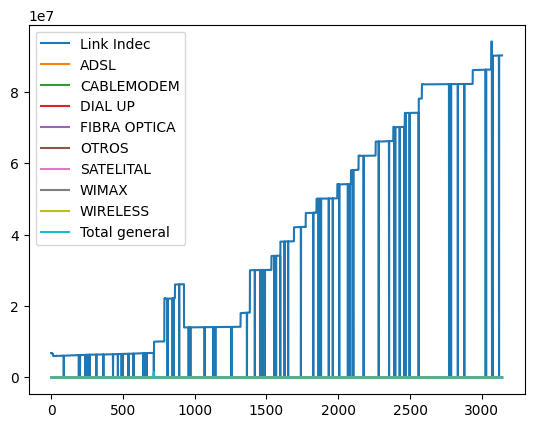

In [86]:
#Intentemos graficar el dataframe
acc_int_fijo.plot()

In [88]:
#Por si las dudas copiamos el dataset, por los cambios
acc_int_fijo = acc_int_fijo

In [89]:
#Guardamos el dataset para tener los datos limpios
acc_int_fijo.to_csv('Datasets/Obligatorios/acceso_internet_limpio.csv')

Vemos que no nos explica mucho, así que debemos hacer algo más

In [93]:
acc_int_fijo = pd.read_csv('Datasets/Obligatorios/acceso_internet_limpio.csv')

<Axes: >

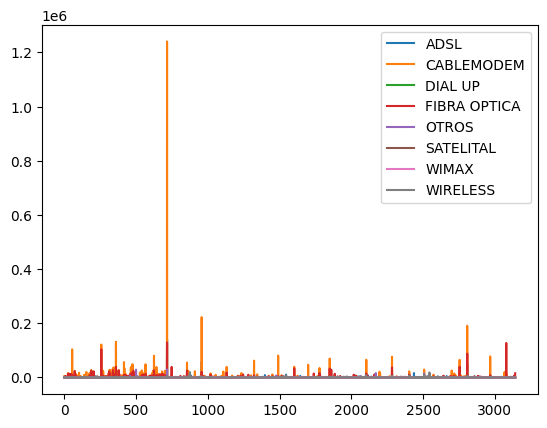

In [94]:
#Veamos el gráfico sin el 'Total General' y sin 'Link Indec'
acc_int_fijo[['Provincia', 'Partido', 'Localidad', 'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].plot()

Esta gráfica no nos dice nada.

<Axes: >

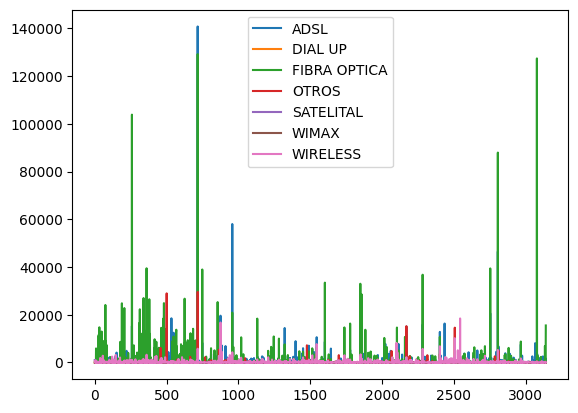

In [95]:
#Aún no tenemos resultados claros, quitamos ahora 'CableModem'
acc_int_fijo[['Provincia', 'Partido', 'Localidad', 'ADSL', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].plot()

Bueno, realmente tampoco nos dice mucho, solo vemos el incremento que ha tenido la fibra óptica y que el sefundo más visto es el ADSL, podemos quitar las columnas que tienen más datos, pero si hacemos una gráfica de cajas y bigotes

In [96]:
#Importamos las librerías neesarias
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

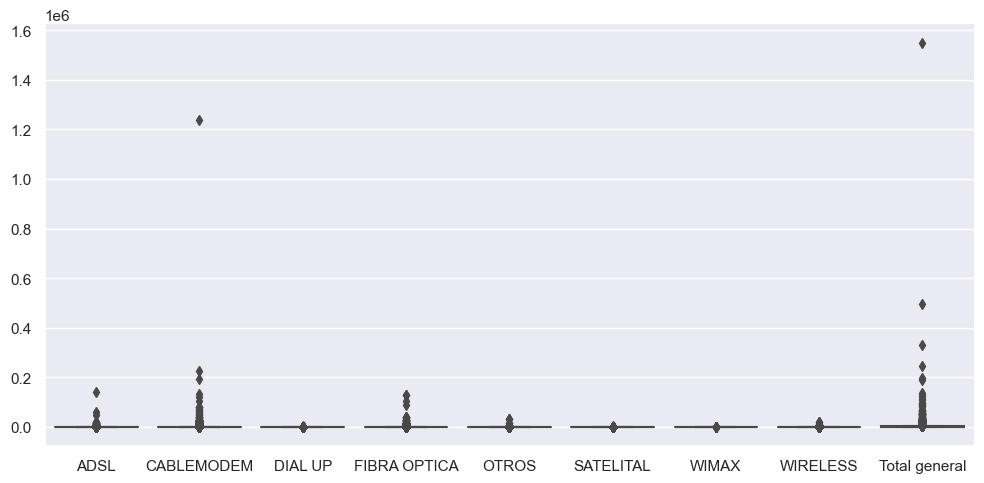

In [97]:
#Lo intentamos primero con todas las columnas
datos = acc_int_fijo[['Provincia', 'Partido', 'Localidad', 'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']]
sns.catplot(data = datos, ci = "sd", estimator=np.mean, kind='box', height = 5, aspect = 2)
#Aquí se usó 'heigth' que es la altura y 'aspect' igual a 2 que indica el doble de ancho que de alto

Vemos cuales son los valores que tienen 'outliers', así que los sacamos para verlos de forma individual

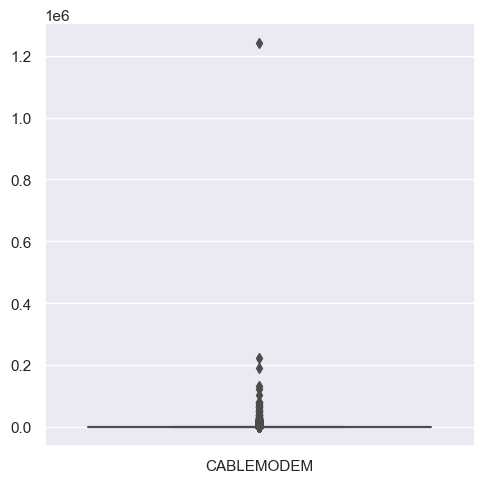

In [98]:
datos = acc_int_fijo[['CABLEMODEM']]
sns.catplot(data = datos, ci = "sd", estimator=np.mean, kind='box', height = 5, aspect = 1)
#Aquí le damos 1 para que sea equitativa la distribución de la altura

Sacando CABLEMODEM para ver los datos, vemos que hay valores muy extraños.

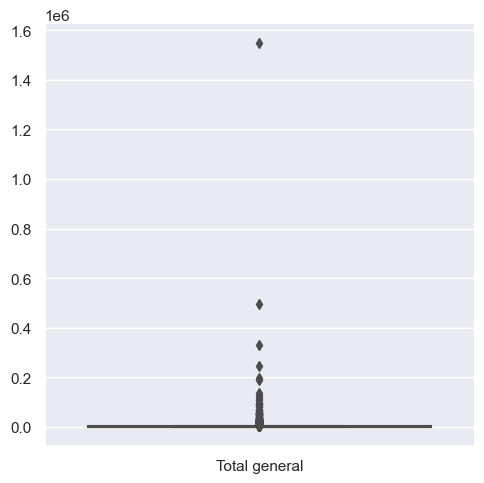

In [99]:
datos = acc_int_fijo[['Total general']]
sns.catplot(data = datos, ci = "sd", estimator=np.mean, kind='box', height = 5, aspect = 1)

Lo mismo pasa con Total general.

In [100]:
datos = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/acceso_internet_limpio.csv')

/var/folders/f5/7p5qbfcx0dlg0t_k8kl9m06w0000gn/T/ipykernel_1031/3067326461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos_acc, bins=25, rug = True)


<Axes: ylabel='Density'>

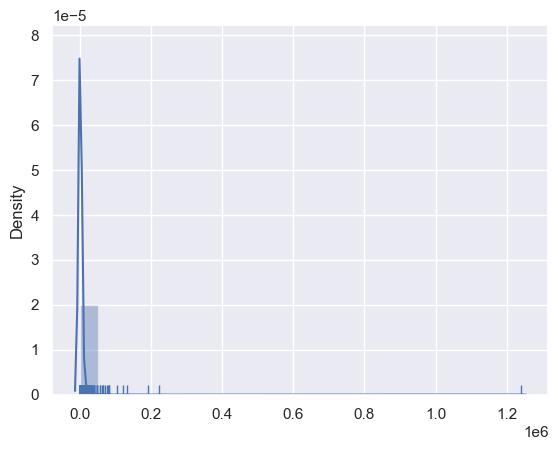

In [101]:
datos_acc = datos[['CABLEMODEM']]
sns.distplot(datos_acc, bins=25, rug = True)

Igualmente no nos dice mucho esta gráfica

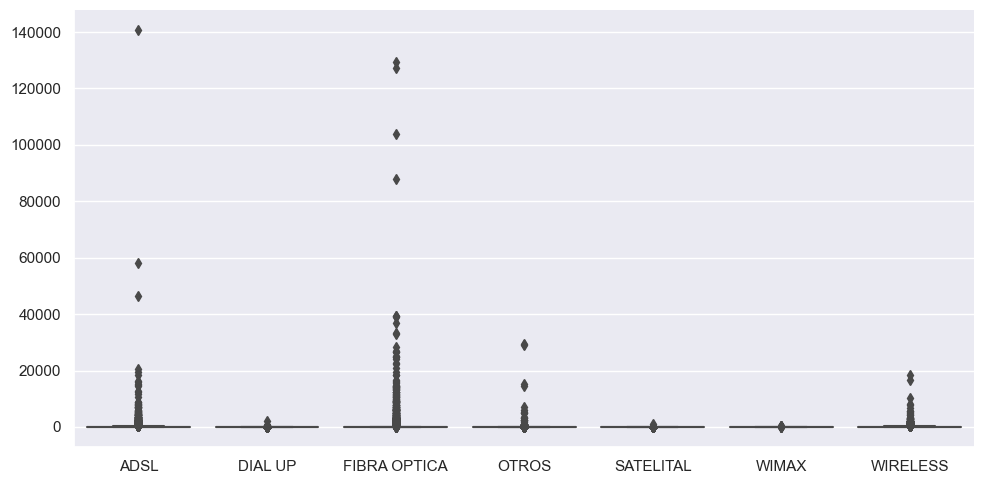

In [102]:
#Si vemos ahora los datos sin esas dos columnas
grafico = datos[['Provincia', 'Partido', 'Localidad', 'ADSL', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']]
sns.catplot(data = grafico, ci = "sd", estimator=np.mean, kind='box', height = 5, aspect = 2)

Como podemos ver, hay valores 'outliers', no hay tal cual algun conjunto de valores con los cuales pudieramos trabajar, así que veremos si más adelante con los ETL podemos sacar mejores resultados en el EDA

<Axes: ylabel='Count'>

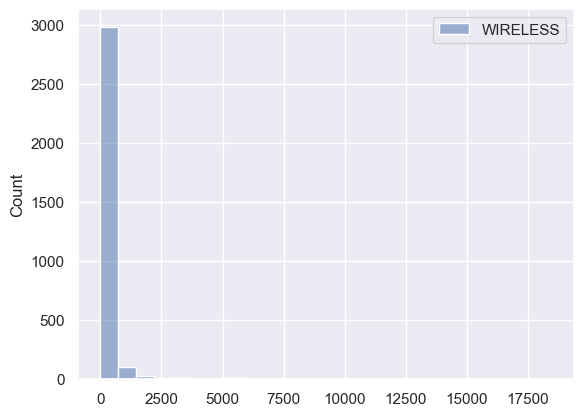

In [103]:
datos_acc = datos[['WIRELESS']]
sns.histplot(datos_acc, bins=25)

Si separamos el dato del que hablamos, vemos con mayor claridad cual es la distribución de los datos, hay más en cero pero existen como ya sabiamos valores 'outliers' que nos distribuyen más los datos

In [106]:
datos.columns

Index(['Unnamed: 0', 'Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL',
       'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX',
       'WIRELESS', 'Total general'],
      dtype='object')

In [116]:
datos.head(2)

Unnamed: 0     Provincia     Partido   Localidad  Link Indec  ADSL   
0           0  BUENOS AIRES  25 de Mayo  25 de Mayo     6854100   873  \
1           1  BUENOS AIRES  25 de Mayo   Del Valle     6854020   181   

   CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS   
0        4704        0             2      0        975      0       664  \
1           0        0             0     10          1      0         0   

   Total general  
0           7218  
1            192

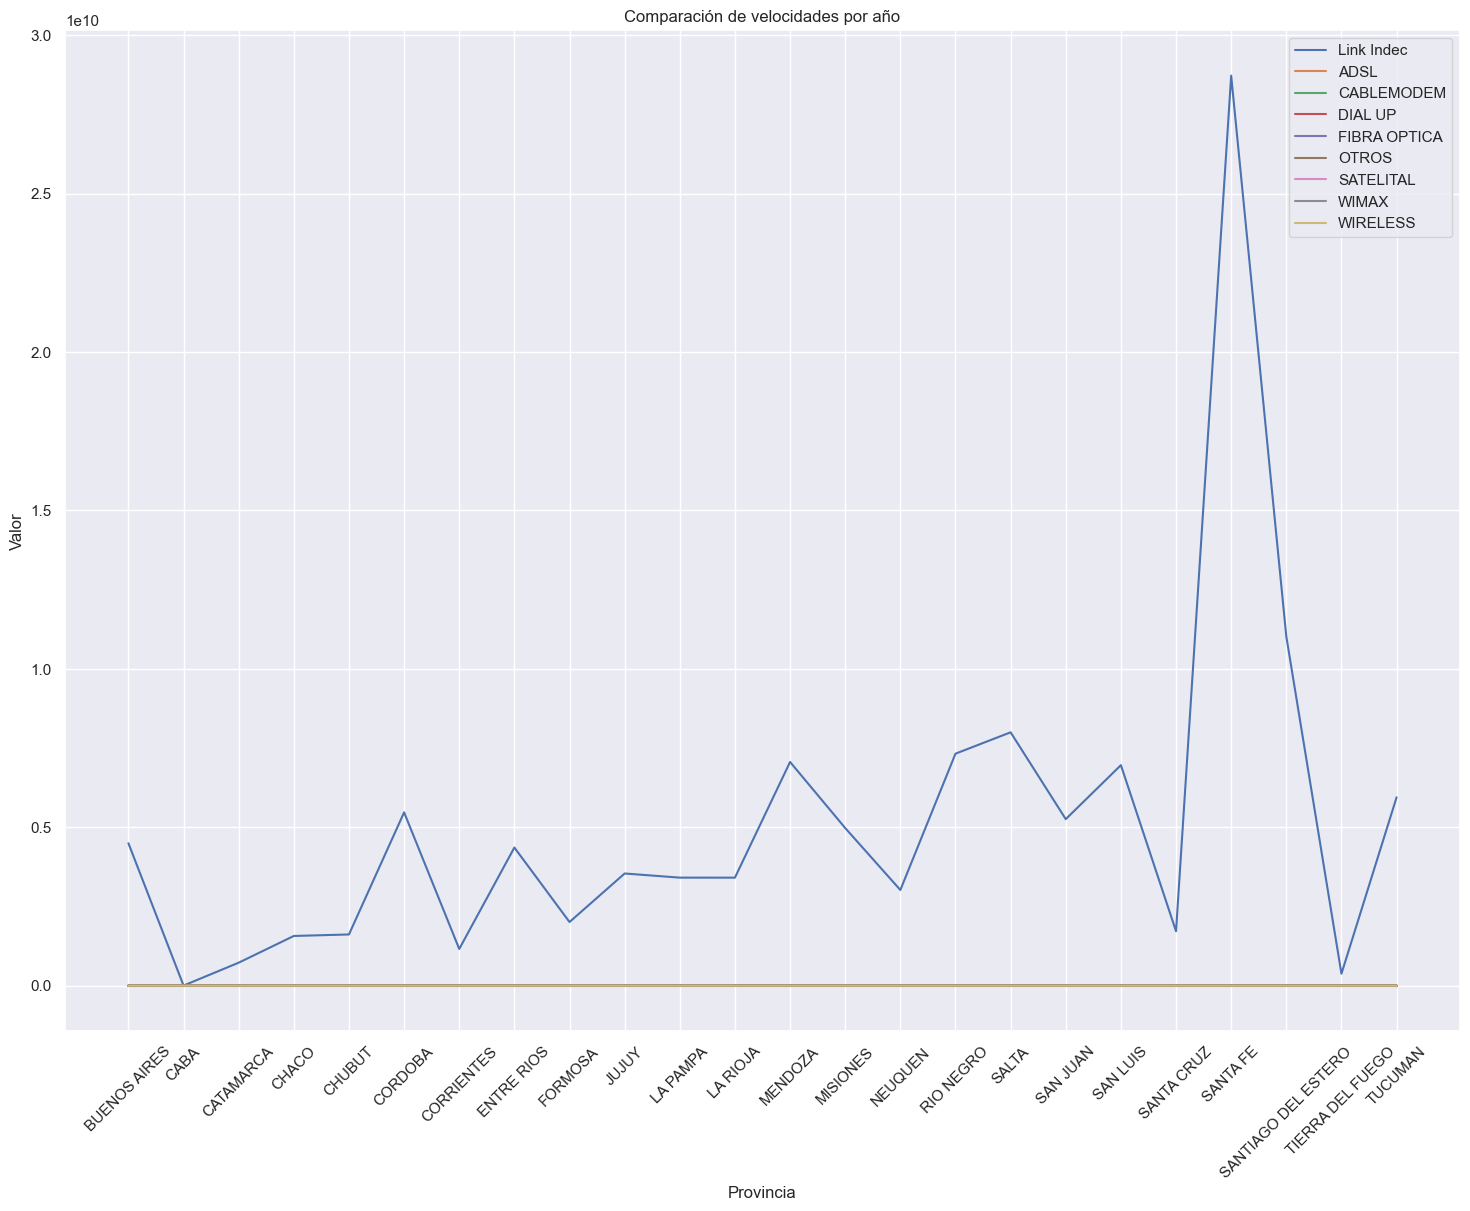

In [114]:
#Seleccionamos las columnas relevantes
columnas_comparar = ['Link Indec', 'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX','WIRELESS']

#Comparamos las columnas con la columna 'Provincia'
comparacion = datos[columnas_comparar].groupby(datos['Provincia']).sum()

#Creamos una figura y ejes para la gráfica
fig, ax = plt.subplots(figsize=(18, 13))

#Generamos una gráfica para cada columna a comparar
for columna in columnas_comparar:
    ax.plot(comparacion.index, comparacion[columna], label=columna)

#Configuramos los detalles de la gráfica
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')
ax.set_title('Comparación de velocidades por año')
ax.legend()

#Mostramos la gráfica
plt.xticks(rotation=45)
plt.show()

Vemos que tenemos valores muy altos en una de las columnas, así que será mejor que podamos eliminarla para que se van mejor los otros resultados

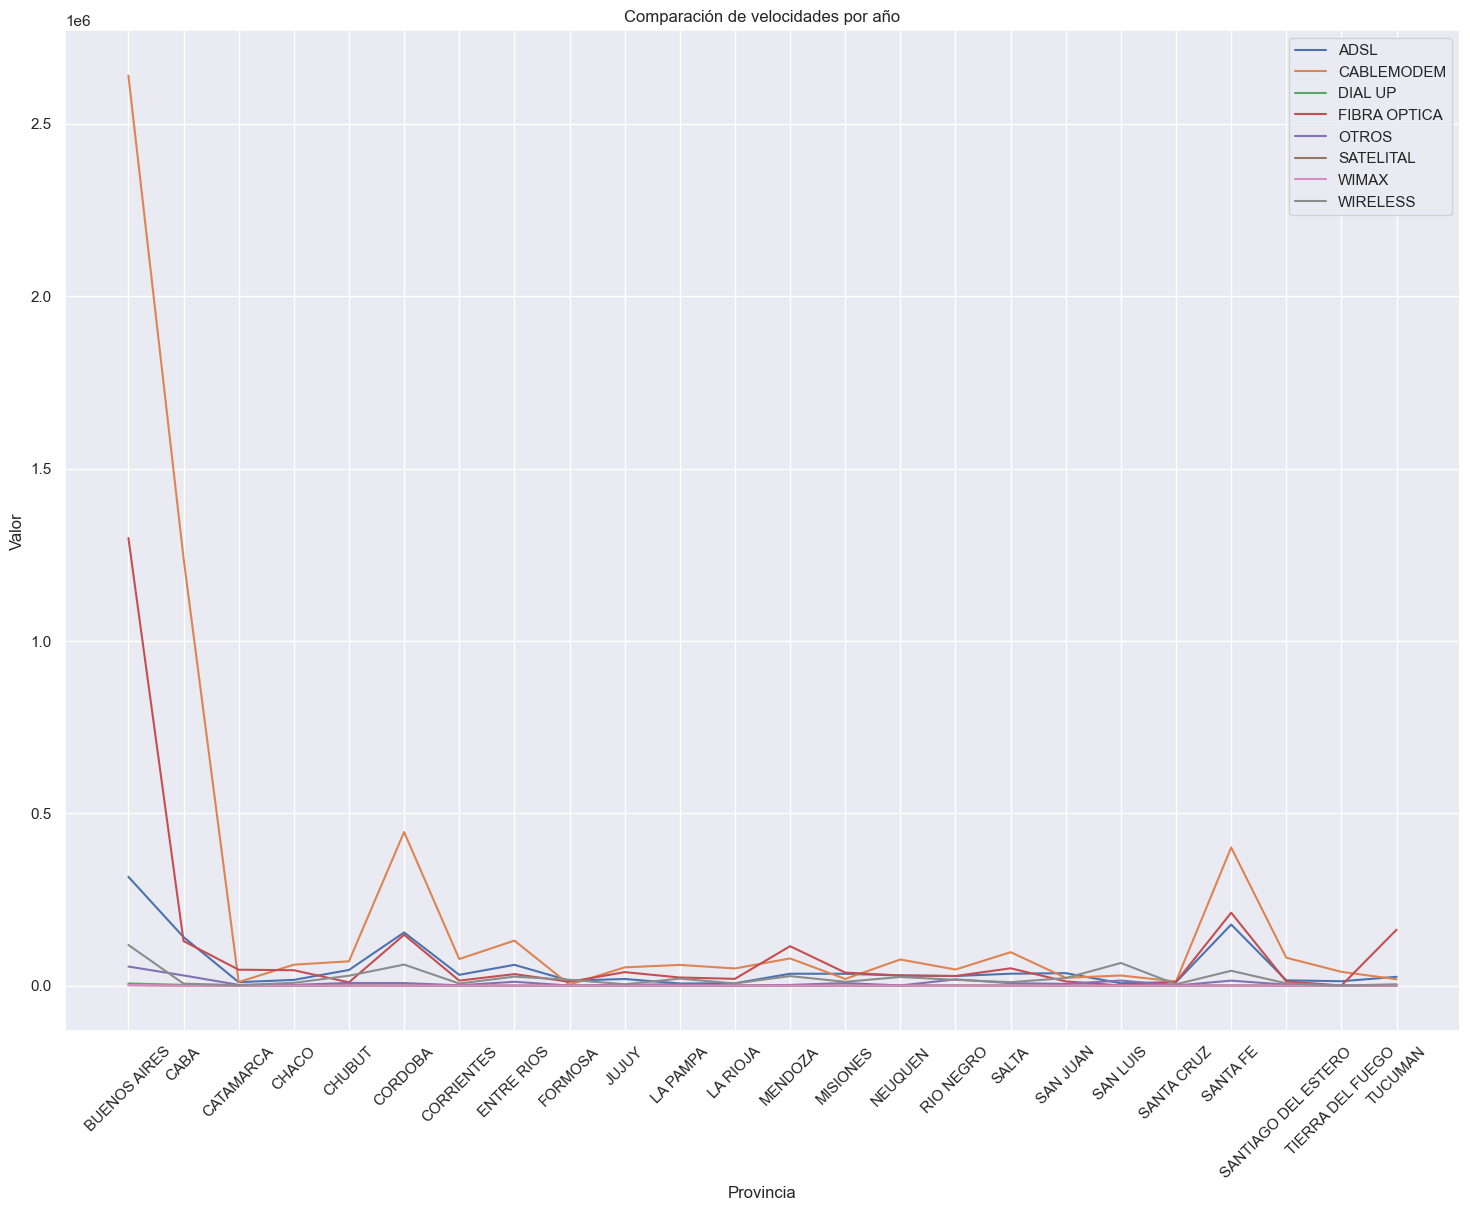

In [113]:
#Eliminamos la columna Link Indec

#Seleccionamos las columnas relevantes
columnas_comparar = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX','WIRELESS']

#Comparamos las columnas con la columna 'Provincia'
comparacion = datos[columnas_comparar].groupby(datos['Provincia']).sum()

#Creamos una figura y ejes para la gráfica
fig, ax = plt.subplots(figsize=(18, 13))

#Generamos una gráfica para cada columna a comparar
for columna in columnas_comparar:
    ax.plot(comparacion.index, comparacion[columna], label=columna)

#Configuramos los detalles de la gráfica
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')
ax.set_title('Comparación de velocidades por año')
ax.legend()

#Mostramos la gráfica
plt.xticks(rotation=45)
plt.show()

Aunque se ve mejor, aún no vemos bien los datos, son muchos y variados

<Axes: xlabel='CABLEMODEM', ylabel='Provincia'>

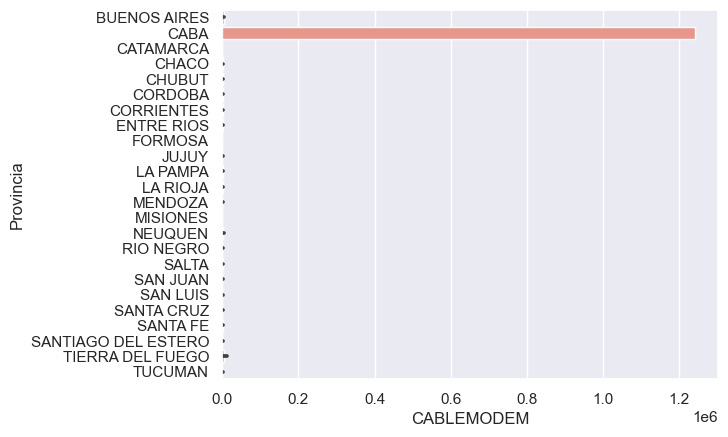

In [137]:
#Ahora veamos algo más
sns.barplot(x = datos['CABLEMODEM'], y = datos['Provincia'])

Vemos como la Capital de Buenos Aires es quien tiene muchísimos más registro de CABLEMODEM, era de esperarse.

<Axes: xlabel='FIBRA OPTICA', ylabel='Provincia'>

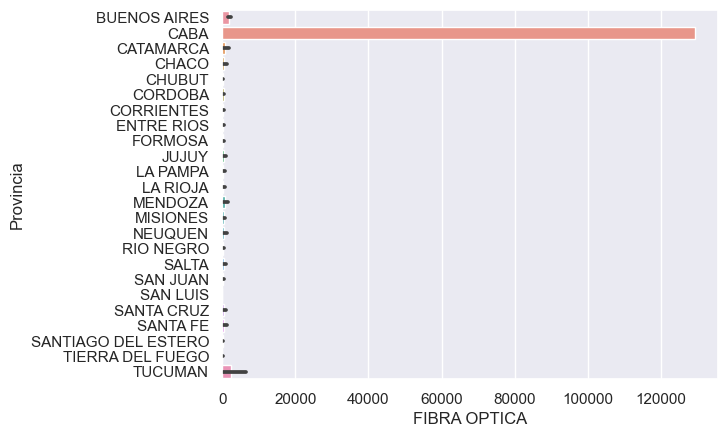

In [136]:
sns.barplot(x = datos['FIBRA OPTICA'], y = datos['Provincia'])

Ahora con esta segunda gráfica podemos ver como es que con la Fibra Óptica tenemos varias Provincias que a diferencia del Cablemodem tienen más valor.

# Pasamos al siguiente archivo

In [117]:
#Cargamos los datos de los dos archivos con el mismo nombre
historico_uno = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/historico_velocidad_internet (1).csv')

In [118]:
#Segundo dataset
historico_dos = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/historico_velocidad_internet.csv')

In [119]:
#Vemos la información del primero
historico_uno.head()

Año  Trimestre        Provincia  Mbps (Media de bajada)  Unnamed: 4   
0  2022          3     Buenos Aires                      70         NaN  \
1  2022          3  Capital Federal                     101         NaN   
2  2022          3        Catamarca                      61         NaN   
3  2022          3            Chaco                      53         NaN   
4  2022          3           Chubut                      16         NaN   

   Unnamed: 5  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [120]:
#Vemos el tipo de dato
historico_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [121]:
#Vemos que la columna 'Provincia' es de un tipo incorrecto, lo 
#cambiamos, primero asignamos a una variable para hacer pruebas 
prov = historico_uno['Provincia']
prov = prov.astype('string')

In [122]:
#Confirmamos el cambio
prov.info()

<class 'pandas.core.series.Series'>
RangeIndex: 840 entries, 0 to 839
Series name: Provincia
Non-Null Count  Dtype 
--------------  ----- 
840 non-null    string
dtypes: string(1)
memory usage: 6.7 KB


In [123]:
#Aplicamos al dataset
historico_uno['Provincia'] = historico_uno['Provincia'].astype('string')

In [124]:
#Vemos el resultado del cambio en la columna
historico_uno['Provincia'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 840 entries, 0 to 839
Series name: Provincia
Non-Null Count  Dtype 
--------------  ----- 
840 non-null    string
dtypes: string(1)
memory usage: 6.7 KB


In [125]:
#Ahora vemos la información de todo el dataset
historico_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    string 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), string(1)
memory usage: 39.5 KB


Como vemos, hay dos columnas sin datos, así que eliminamos esas para que el dataset sea correcto

In [126]:
historico_uno.columns

Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [127]:
#Indicamos las columnas que necesitaremos
historico_uno = historico_uno[['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)']]

In [128]:
#Confirmamos el contenido con el tipo de datos
historico_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     840 non-null    int64 
 1   Trimestre               840 non-null    int64 
 2   Provincia               840 non-null    string
 3   Mbps (Media de bajada)  840 non-null    int64 
dtypes: int64(3), string(1)
memory usage: 26.4 KB


In [129]:
#Por cualquier cosa, guardamos el dataset limpio
historico_uno.to_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/hist_velocidad_internet_1.csv')

<Axes: >

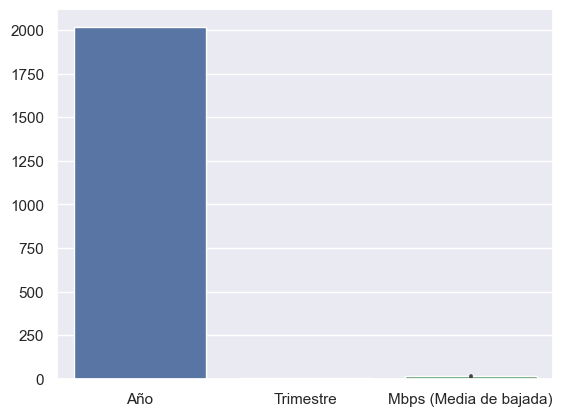

In [130]:
#Vemos un poco los datos gráficados
sns.barplot(data = historico_uno)

Bueno, la gráfica como tal no nos dice nada.

<Axes: >

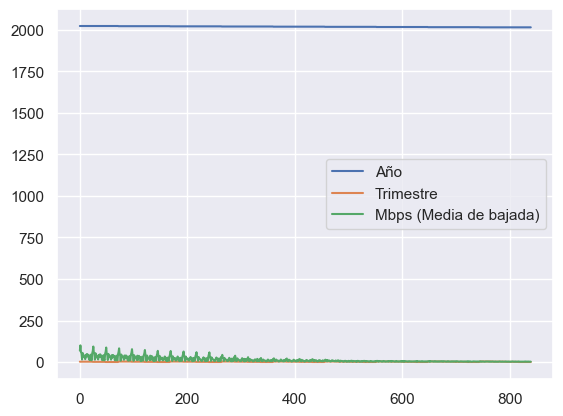

In [132]:
#Lo intentamos con otro tipo de gráfica entonces
historico_uno.plot()

Al ver esta gráfica, se me ocurre que podamos ver el año que tuvo más Mbps

<Axes: xlabel='Año', ylabel='Mbps (Media de bajada)'>

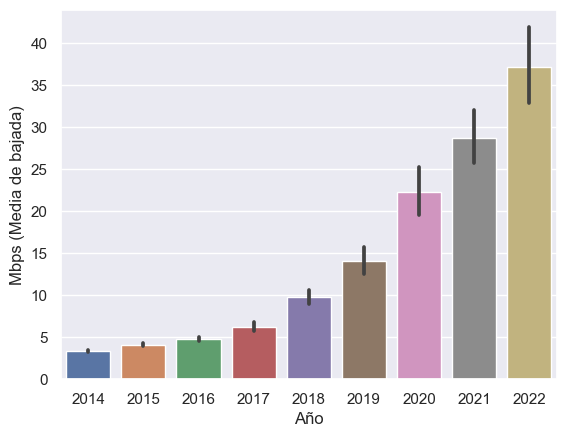

In [133]:
#Vemos otro tipo de gráfico
sns.barplot(x = historico_uno['Año'], y = historico_uno['Mbps (Media de bajada)'])

Vemos como se ve el incremento de año a año de Mbps con respecto al año

<Axes: xlabel='Año', ylabel='Mbps (Media de bajada)'>

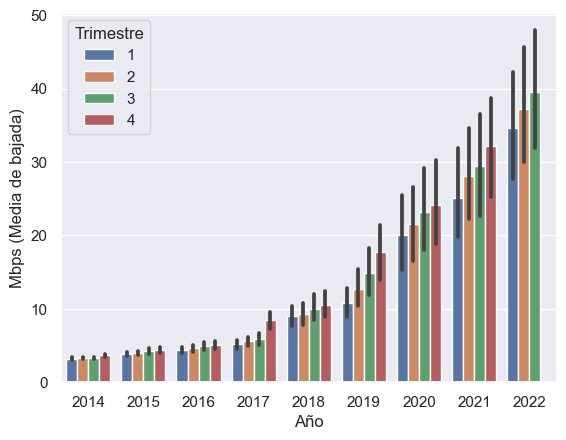

In [134]:
#Modificamos los valores
sns.barplot(x = historico_uno['Año'], y = historico_uno['Mbps (Media de bajada)'], hue = historico_uno['Trimestre'])

Ahora, si vemos la comparativa por trimestre, vemos los incrementos de esta forma

Se me ocurre entonces ver cual es la provincia con más incremento de Mbps

<Axes: xlabel='Mbps (Media de bajada)', ylabel='Provincia'>

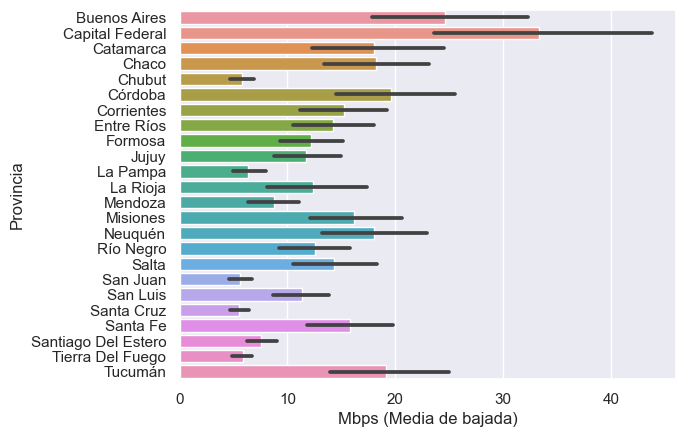

In [138]:
#Uno más con algunas modificaciones
sns.barplot(y = historico_uno['Provincia'], x = historico_uno['Mbps (Media de bajada)'])

Con esta gráfica podemos ver cual es la Provincia que tiene más Mbps.

### Pasamos con el siguiente dataset

In [139]:
historico_dos.head()

Año  Trimestre Mbps (Media de bajada)    Trimestre.1
0  2022          3                  62,46  Jul-Sept 2022
1  2022          2                  58,44   Abr-Jun 2022
2  2022          1                  55,11   Ene-Mar 2022
3  2021          4                  52,34   Oct-Dic 2021
4  2021          3                  48,46  Jul-Sept 2021

In [140]:
historico_dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     35 non-null     int64 
 1   Trimestre               35 non-null     int64 
 2   Mbps (Media de bajada)  35 non-null     object
 3   Trimestre.1             35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


Vemos que dos de las gráficas no tienen el tipo de dato correcto, aunque una de ellas no es relevante, cambiamos solo una.

In [141]:
megas = historico_dos['Mbps (Media de bajada)']
megas = megas.astype('string')

In [142]:
megas.info()

<class 'pandas.core.series.Series'>
RangeIndex: 35 entries, 0 to 34
Series name: Mbps (Media de bajada)
Non-Null Count  Dtype 
--------------  ----- 
35 non-null     string
dtypes: string(1)
memory usage: 408.0 bytes


In [143]:
historico_dos['Mbps (Media de bajada)'] = historico_dos['Mbps (Media de bajada)'].astype('string')

In [144]:
historico_dos['Mbps (Media de bajada)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 35 entries, 0 to 34
Series name: Mbps (Media de bajada)
Non-Null Count  Dtype 
--------------  ----- 
35 non-null     string
dtypes: string(1)
memory usage: 408.0 bytes


In [145]:
#Vemos el cambio realizado
historico_dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     35 non-null     int64 
 1   Trimestre               35 non-null     int64 
 2   Mbps (Media de bajada)  35 non-null     string
 3   Trimestre.1             35 non-null     object
dtypes: int64(2), object(1), string(1)
memory usage: 1.2+ KB


Aquí podemos hacer lo mismo que con el dataset anterior, ver en que año y en que trimetre hubo más Mbps.

<Axes: xlabel='Año', ylabel='Mbps (Media de bajada)'>

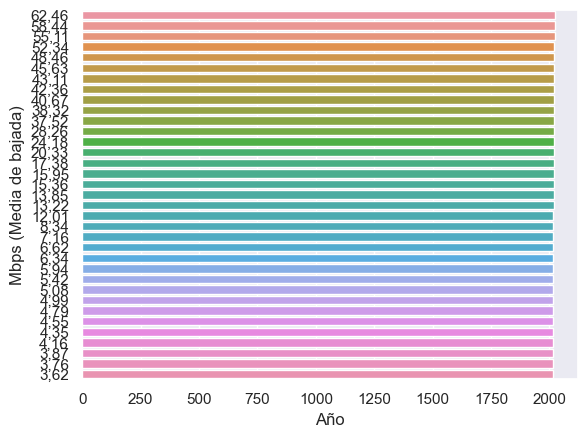

In [146]:
#Graficamos
sns.barplot(x = historico_dos['Año'], y = historico_dos['Mbps (Media de bajada)'])

Definitivamente esta gráfica no nos dice absolutamente nada, solo se ve bien.

<Axes: xlabel='Mbps (Media de bajada)', ylabel='Año'>

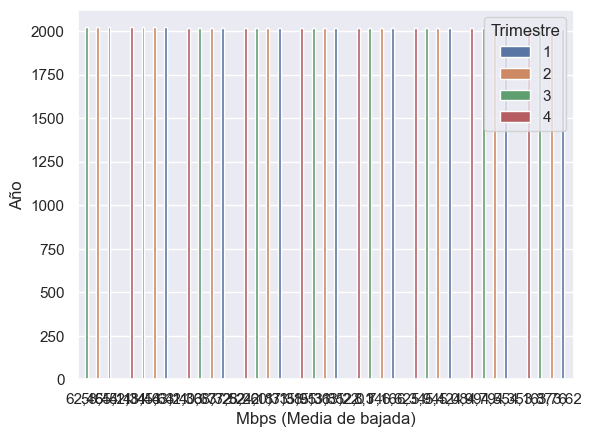

In [147]:
#Graficamos una vez más
sns.barplot(x = historico_dos['Mbps (Media de bajada)'], y = historico_dos['Año'], hue = historico_dos['Trimestre'])

Tampoco nos dice mucho esta segunda gráfica, entonces tratemos de buscar algo más, alguna otra que pueda explicar mejor los datos.

<Axes: xlabel='Año', ylabel='Mbps (Media de bajada)'>

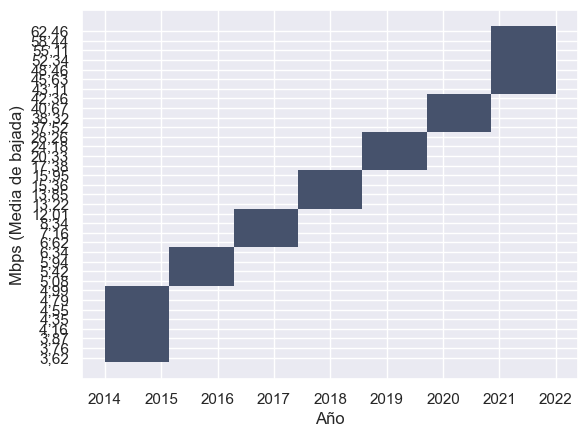

In [150]:
#Intentamos con esta otra
sns.histplot(x = historico_dos['Año'], y = historico_dos['Mbps (Media de bajada)'])

Vemos el incremento por año, pero realmente no dice mucho, sabemos que es obvio que incrementaría la velocidad de internet con el paso del tiempo, por las diferentes tecnologías como la actualización a fibra óptica.

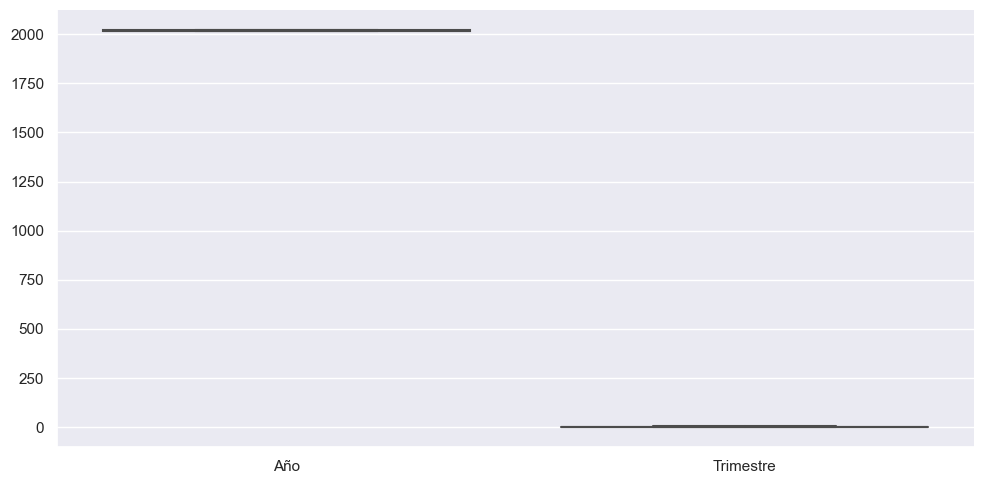

In [151]:
#Intentemos otra cosa
sns.catplot(data = historico_dos, ci = "sd", estimator=np.mean, kind='box', height = 5, aspect = 2)

Haciendo varias pruebas, vemos que la penúltima gráfica es la que mejos se acopla a lo que necesitamos, entonces dejamos esa para poder conocer un poco más al respecto de los datos

<Axes: xlabel='Año', ylabel='Mbps (Media de bajada)'>

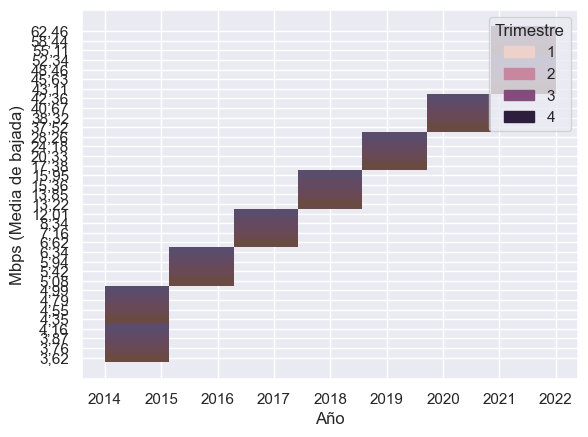

In [152]:
#Una más
sns.histplot(x = historico_dos['Año'], y = historico_dos['Mbps (Media de bajada)'], hue = historico_dos['Trimestre'])

Aquí se intentó realizar un HUE con el trimestr, pero el resultado no fue el esperado, entonces, se dejará la gráfica siguiente.

<Axes: xlabel='Año', ylabel='Mbps (Media de bajada)'>

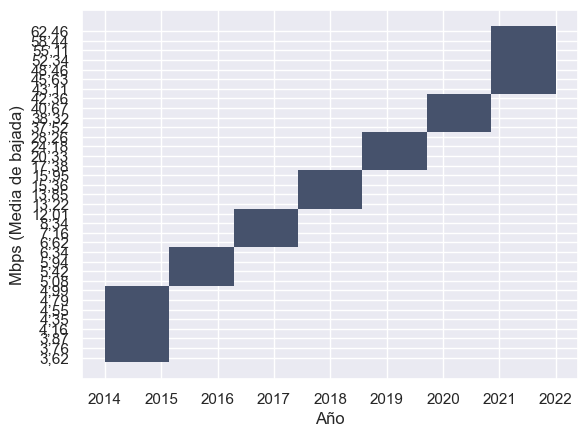

In [153]:
#Otra gráfica más
sns.histplot(x = historico_dos['Año'], y = historico_dos['Mbps (Media de bajada)'])

Realmente este último dataset no nos aporta mucho, así que se tomará la desición de no tomarlo en cuenta.

## Continuamos con los datasets: Internet_Accesos_por_tecnología

In [154]:
acces_tech_uno = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_Accesos-por-tecnologia.csv')

In [155]:
acces_tech_uno.head()

Año  Trimestre       ADSL Cablemodem Fibra óptica  Wireless    Otros   
0  2022          3  1.395.277  6.031.970    2.871.541   557.110  235.230  \
1  2022          2  1.468.333  5.979.214    2.723.285   556.243  231.609   
2  2022          1  1.533.240  6.073.426    2.219.533   545.814  251.996   
3  2021          4  1.657.615  5.984.240    2.072.236   523.107  252.596   
4  2021          3  1.950.631  5.826.257    1.566.048   492.415  250.190   

        Total        Periodo  
0  11.091.128  Jul-Sept 2022  
1  10.958.684   Abr-Jun 2022  
2  10.624.009   Ene-Mar 2022  
3  10.489.794   Oct-Dic 2021  
4  10.085.541  Jul-Sept 2021

Al ver los datos, notamos a simple vista que hay algunas columnas que contienen puntos dentro de sus datos, debemos eliminarlos para que sea un número real

In [156]:
# Reemplazar los puntos por una cadena vacía
acces_tech_uno['ADSL'] = acces_tech_uno['ADSL'].replace('\.', '', regex=True)

# Convertir la columna al tipo 'int'
acces_tech_uno['ADSL'] = acces_tech_uno['ADSL'].astype(int)

In [157]:
acces_tech_uno['ADSL'].head()

0    1395277
1    1468333
2    1533240
3    1657615
4    1950631
Name: ADSL, dtype: int64

In [158]:
acces_tech_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     int64  
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 2.6+ KB


In [159]:
#Reemplazamos los puntos por una cadena vacía
acces_tech_uno['Cablemodem'] = acces_tech_uno['Cablemodem'].replace('\.', '', regex=True)

#Convertimos la columna al tipo 'int'
acces_tech_uno['Cablemodem'] = acces_tech_uno['Cablemodem'].astype(int)

acces_tech_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     int64  
 3   Cablemodem    35 non-null     int64  
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 2.6+ KB


In [160]:
acces_tech_uno['Fibra óptica'] = acces_tech_uno['Fibra óptica'].replace('\.', '', regex=True)

acces_tech_uno['Fibra óptica'] = acces_tech_uno['Fibra óptica'].astype(int)

acces_tech_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     int64  
 3   Cablemodem    35 non-null     int64  
 4   Fibra óptica  35 non-null     int64  
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(5), object(2)
memory usage: 2.6+ KB


In [161]:
acces_tech_uno['Wireless'] = acces_tech_uno['Wireless'].replace('\.', '', regex=True)

acces_tech_uno['Wireless'] = acces_tech_uno['Wireless'].astype(int)

acces_tech_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     int64  
 3   Cablemodem    35 non-null     int64  
 4   Fibra óptica  35 non-null     int64  
 5   Wireless      35 non-null     int64  
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(1), int64(6), object(2)
memory usage: 2.6+ KB


In [162]:
acces_tech_uno['Otros'] = acces_tech_uno['Otros'].replace('\.', '', regex=True)

acces_tech_uno['Otros'] = acces_tech_uno['Otros'].astype(int)

acces_tech_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int64 
 3   Cablemodem    35 non-null     int64 
 4   Fibra óptica  35 non-null     int64 
 5   Wireless      35 non-null     int64 
 6   Otros         35 non-null     int64 
 7   Total         35 non-null     object
 8   Periodo       35 non-null     object
dtypes: int64(7), object(2)
memory usage: 2.6+ KB


In [163]:
acces_tech_uno['Total'] = acces_tech_uno['Total'].replace('\.', '', regex=True)

acces_tech_uno['Total'] = acces_tech_uno['Total'].astype(int)

acces_tech_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int64 
 3   Cablemodem    35 non-null     int64 
 4   Fibra óptica  35 non-null     int64 
 5   Wireless      35 non-null     int64 
 6   Otros         35 non-null     int64 
 7   Total         35 non-null     int64 
 8   Periodo       35 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.6+ KB


In [164]:
#Convertimos la columna a tipo 'int'
acces_tech_uno['Periodo'] = acces_tech_uno['Periodo'].astype('string')

In [165]:
acces_tech_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int64 
 3   Cablemodem    35 non-null     int64 
 4   Fibra óptica  35 non-null     int64 
 5   Wireless      35 non-null     int64 
 6   Otros         35 non-null     int64 
 7   Total         35 non-null     int64 
 8   Periodo       35 non-null     string
dtypes: int64(8), string(1)
memory usage: 2.6 KB


In [166]:
#Aquí ya vemos el dataframe bien hecho, con los datos correctos
acces_tech_uno.head()

Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless  Otros   
0  2022          3  1395277     6031970       2871541       557    235  \
1  2022          2  1468333     5979214       2723285       556    231   
2  2022          1  1533240     6073426       2219533       545    251   
3  2021          4  1657615     5984240       2072236       523    252   
4  2021          3  1950631     5826257       1566048       492    250   

      Total        Periodo  
0  11091128  Jul-Sept 2022  
1  10958684   Abr-Jun 2022  
2  10624009   Ene-Mar 2022  
3  10489794   Oct-Dic 2021  
4  10085541  Jul-Sept 2021

In [167]:
acces_tech_uno.describe()

Año  Trimestre          ADSL    Cablemodem  Fibra óptica   
count    35.000000  35.000000  3.500000e+01  3.500000e+01  3.500000e+01  \
mean   2017.885714   2.457143  3.040425e+06  4.122601e+06  7.390627e+05   
std       2.564135   1.120474  8.354122e+05  1.225277e+06  7.861772e+05   
min    2014.000000   1.000000  1.395277e+06  2.407330e+06  1.391870e+05   
25%    2016.000000   1.500000  2.279711e+06  2.966749e+06  1.679880e+05   
50%    2018.000000   2.000000  3.557216e+06  4.038141e+06  2.262850e+05   
75%    2020.000000   3.000000  3.723156e+06  5.132233e+06  1.138802e+06   
max    2022.000000   4.000000  3.803024e+06  6.073426e+06  2.871541e+06   

         Wireless       Otros         Total  
count   35.000000   35.000000  3.500000e+01  
mean   247.857143  146.971429  8.297800e+06  
std    174.383813   85.900587  1.399611e+06  
min     70.000000   54.000000  6.398398e+06  
25%     85.000000   62.500000  7.057455e+06  
50%    194.000000  100.000000  8.110444e+06  
75%    394.500000  247.500000  9.260442e+06  
max    557.000000  265.000000  1.109113e+07

<Axes: >

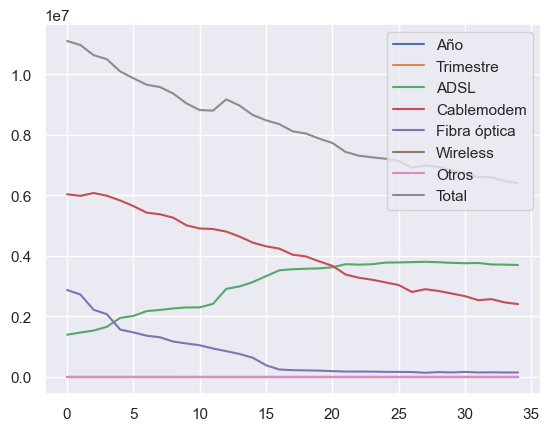

In [168]:
acces_tech_uno.plot()

Vemos un poco de la información contenida en el dataset

In [169]:
acces_tech_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int64 
 3   Cablemodem    35 non-null     int64 
 4   Fibra óptica  35 non-null     int64 
 5   Wireless      35 non-null     int64 
 6   Otros         35 non-null     int64 
 7   Total         35 non-null     int64 
 8   Periodo       35 non-null     string
dtypes: int64(8), string(1)
memory usage: 2.6 KB


In [170]:
#Guardamos el archivo
acces_tech_uno.to_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/int_acces_tech_uno.csv')

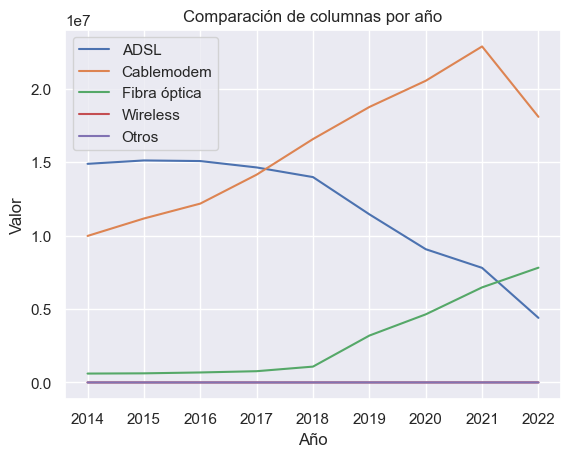

In [171]:
#Seleccionamos las columnas relevantes
columnas_comparar = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

#Comparamos las columnas con la columna 'Año'
comparacion = acces_tech_uno[columnas_comparar].groupby(acces_tech_uno['Año']).sum()

#Creamos una figura y ejes para la gráfica
fig, ax = plt.subplots()

#Generamos una gráfica para cada columna a comparar
for columna in columnas_comparar:
    ax.plot(comparacion.index, comparacion[columna], label=columna)

#Condiguramos los detalles de la gráfica
ax.set_xlabel('Año')
ax.set_ylabel('Valor')
ax.set_title('Comparación de columnas por año')
ax.legend()

#Mostramos la gráfica
plt.show()

Este es el resultado de la gráfica y realmente me sorprende, pensé que el Wireless sería quien encabezara la lista, pero vemos claramente como el CableModem es quien gana. Soy de México, y hacienod una investigación pude notar que el cablemodem es el modem del internet que saca la señal wifi, entonces es normal, creo es lo que más se usa hoy en día. Otros datos importantes son la caida del ADSL que es el internet alámbrico según investigué, va bajando considerablemente con el paso del tiempo, vemos como de ser el primero, hoy en día ya es el tercero, y como segundo, va en incremento la fibra óptica, como sabemos al inicio cuando tuvimos la oportunidad de pasar a este tipo de cableado, resultaba muy caro y poco costeable, pero hoy en día es más sencillo poder acceder a servicios de internet mediante esta tecnología que apenas desde el 2018 va subiendo. Interesante información resultante.

Aunque el dataset tiene pocos datos, se reflexionará con respecto a no tomarlo en cuenta.

# Cargamos el segundo dataset

In [172]:
acces_tech_dos = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_Accesos-por-tecnologia (1).csv')

In [173]:
acces_tech_dos.head()

Año Trimestre        Provincia     ADSL Cablemodem Fibra óptica  Wireless   
0  2022         3     Buenos Aires  339.648  2.748.325    1.436.433   126.846  \
1  2022         3  Capital Federal  140.791  1.240.125      129.218     5.758   
2  2022         3        Catamarca   10.010     10.495       46.224     1.329   
3  2022         3            Chaco   27.164     61.800       44.645     8.178   
4  2022         3           Chubut   45.377     72.212        9.574    29.784   

    Otros      Total  
0  70.416  4.721.668  
1  31.787  1.547.679  
2   2.235     70.293  
3   2.359    144.146  
4   8.831    165.778

In [174]:
#Revisamos que los tipos de datos sean los correctos
acces_tech_dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [175]:
#Vemos que no, entonces hacemos el cambio de las que lo requieran
# Reemplazar los puntos por una cadena vacía
acces_tech_dos['ADSL'] = acces_tech_dos['ADSL'].replace('\.', '', regex=True)
acces_tech_dos['Cablemodem'] = acces_tech_dos['Cablemodem'].replace('\.', '', regex=True)
acces_tech_dos['Fibra óptica'] = acces_tech_dos['Fibra óptica'].replace('\.', '', regex=True)
acces_tech_dos['Wireless'] = acces_tech_dos['Wireless'].replace('\.', '', regex=True)
acces_tech_dos['Otros'] = acces_tech_dos['Otros'].replace('\.', '', regex=True)
acces_tech_dos['Total'] = acces_tech_dos['Total'].replace('\.', '', regex=True)

# Convertir la columna al tipo 'int'
acces_tech_dos['ADSL'] = acces_tech_dos['ADSL'].astype(float)
acces_tech_dos['Cablemodem'] = acces_tech_dos['Cablemodem'].astype(float)
acces_tech_dos['Fibra óptica'] = acces_tech_dos['Fibra óptica'].astype(float)
acces_tech_dos['Wireless'] = acces_tech_dos['Wireless'].astype(float)
acces_tech_dos['Total'] = acces_tech_dos['Total'].astype(float)
acces_tech_dos['Otros'] = acces_tech_dos['Otros'].astype(float)
acces_tech_dos['Total'] = acces_tech_dos['Total'].astype(float)

acces_tech_dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    float64
 4   Cablemodem    840 non-null    float64
 5   Fibra óptica  840 non-null    float64
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    float64
dtypes: float64(6), object(3)
memory usage: 59.3+ KB


In [176]:
acces_tech_dos.head()

Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica   
0  2022         3     Buenos Aires  339648.0   2748325.0     1436433.0  \
1  2022         3  Capital Federal  140791.0   1240125.0      129218.0   
2  2022         3        Catamarca   10010.0     10495.0       46224.0   
3  2022         3            Chaco   27164.0     61800.0       44645.0   
4  2022         3           Chubut   45377.0     72212.0        9574.0   

   Wireless   Otros      Total  
0   126.846  70.416  4721668.0  
1     5.758  31.787  1547679.0  
2     1.329   2.235    70293.0  
3     8.178   2.359   144146.0  
4    29.784   8.831   165778.0

In [177]:
#Reemplazamos los valores NaN por cero
acces_tech_dos['Wireless'] = acces_tech_dos['Wireless'].fillna(0)

#Eliminamos el punto decimal de los valores en la columna 'Wireless'
acces_tech_dos['Wireless'] = acces_tech_dos['Wireless'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [178]:
acces_tech_dos['Wireless'].head()

0    126846
1      5758
2      1329
3      8178
4     29784
Name: Wireless, dtype: int64

In [179]:
acces_tech_dos['Otros'] = acces_tech_dos['Otros'].fillna(0)

acces_tech_dos['Otros'] = acces_tech_dos['Otros'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [180]:
acces_tech_dos['Otros'].head()

0    70416
1    31787
2     2235
3     2359
4     8831
Name: Otros, dtype: int64

In [181]:
acces_tech_dos.head(3)

Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica   
0  2022         3     Buenos Aires  339648.0   2748325.0     1436433.0  \
1  2022         3  Capital Federal  140791.0   1240125.0      129218.0   
2  2022         3        Catamarca   10010.0     10495.0       46224.0   

   Wireless  Otros      Total  
0    126846  70416  4721668.0  
1      5758  31787  1547679.0  
2      1329   2235    70293.0

In [182]:
#Eliinamos los asteriscos de los valores en la columna 'Año'
acces_tech_dos['Año'] = acces_tech_dos['Año'].replace('\*', '', regex=True)

#Convertimos la columna 'Año' al tipo int
acces_tech_dos['Año'] = pd.to_numeric(acces_tech_dos['Año'], errors='coerce').astype('Int64')

In [183]:
acces_tech_dos['Año'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 841 entries, 0 to 840
Series name: Año
Non-Null Count  Dtype
--------------  -----
840 non-null    Int64
dtypes: Int64(1)
memory usage: 7.5 KB


In [184]:
acces_tech_dos['Trimestre'] = acces_tech_dos['Trimestre'].replace('\*', '', regex=True)

acces_tech_dos['Trimestre'] = pd.to_numeric(acces_tech_dos['Trimestre'], errors='coerce').astype('Int64')

In [185]:
acces_tech_dos['Trimestre'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 841 entries, 0 to 840
Series name: Trimestre
Non-Null Count  Dtype
--------------  -----
840 non-null    Int64
dtypes: Int64(1)
memory usage: 7.5 KB


In [186]:
#Vemos que no, entonces hacemos el cambio de las que lo requieran
acces_tech_dos['Provincia'] = acces_tech_dos['Provincia'].replace('\.', '', regex=True)

acces_tech_dos['Provincia'] = acces_tech_dos['Provincia'].astype('string')

In [187]:
acces_tech_dos['Provincia'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 841 entries, 0 to 840
Series name: Provincia
Non-Null Count  Dtype 
--------------  ----- 
840 non-null    string
dtypes: string(1)
memory usage: 6.7 KB


In [188]:
#Listo, tenemos los datos transformados
acces_tech_dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           840 non-null    Int64  
 1   Trimestre     840 non-null    Int64  
 2   Provincia     840 non-null    string 
 3   ADSL          840 non-null    float64
 4   Cablemodem    840 non-null    float64
 5   Fibra óptica  840 non-null    float64
 6   Wireless      841 non-null    int64  
 7   Otros         841 non-null    int64  
 8   Total         840 non-null    float64
dtypes: Int64(2), float64(4), int64(2), string(1)
memory usage: 60.9 KB


In [189]:
acces_tech_dos.describe()

Año  Trimestre          ADSL    Cablemodem  Fibra óptica   
count        840.0      840.0  8.400000e+02  8.400000e+02  8.400000e+02  \
mean   2017.885714   2.457143  1.275668e+05  1.717750e+05  2.991186e+04   
std       2.528745   1.105009  2.550543e+05  4.221661e+05  1.235013e+05   
min         2014.0        1.0  6.842000e+03  0.000000e+00  0.000000e+00   
25%         2016.0        1.0  2.247925e+04  8.599750e+03  1.860000e+02   
50%         2018.0        2.0  4.859600e+04  3.498400e+04  1.093000e+03   
75%         2020.0        3.0  1.045695e+05  7.074850e+04  1.386250e+04   
max         2022.0        4.0  1.586343e+06  2.748325e+06  1.436433e+06   

            Wireless         Otros         Total  
count     841.000000    841.000000  8.400000e+02  
mean     9925.602854   6596.027348  3.457417e+05  
std     17557.103805  10129.497238  7.419436e+05  
min         0.000000      0.000000  1.255700e+04  
25%      1139.000000    750.000000  5.202975e+04  
50%      4260.000000   2734.000000  1.034895e+05  
75%     11331.000000   7545.000000  1.779148e+05  
max    126887.000000  73415.000000  4.721668e+06

In [190]:
#Ahora guardamos el archivo resultante
acces_tech_dos.to_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/int_acces_tech_dos.csv')

In [191]:
acces_tech_dos.tail(10)

Año  Trimestre            Provincia      ADSL  Cablemodem  Fibra óptica   
831  2014          1            Río Negro   64886.0     24156.0         876.0  \
832  2014          1                Salta   73131.0     17538.0          45.0   
833  2014          1             San Juan   48161.0       434.0         722.0   
834  2014          1             San Luis   11306.0       428.0         354.0   
835  2014          1           Santa Cruz   18927.0       100.0         381.0   
836  2014          1             Santa Fe  322662.0    174296.0        3059.0   
837  2014          1  Santiago Del Estero   32567.0      3598.0          19.0   
838  2014          1     Tierra Del Fuego   21618.0      2837.0         648.0   
839  2014          1              Tucumán  129717.0        83.0         121.0   
840  <NA>       <NA>                 <NA>       NaN         NaN           NaN   

     Wireless  Otros     Total  
831      3576   1572   95066.0  
832        80   5680   91290.0  
833      8080   1173   51298.0  
834       210   4480   12557.0  
835      4092   3264   26764.0  
836      5951   6440  506612.0  
837      9150    340   37133.0  
838        10   2934   28038.0  
839       130    980  130032.0  
840         0      0       NaN

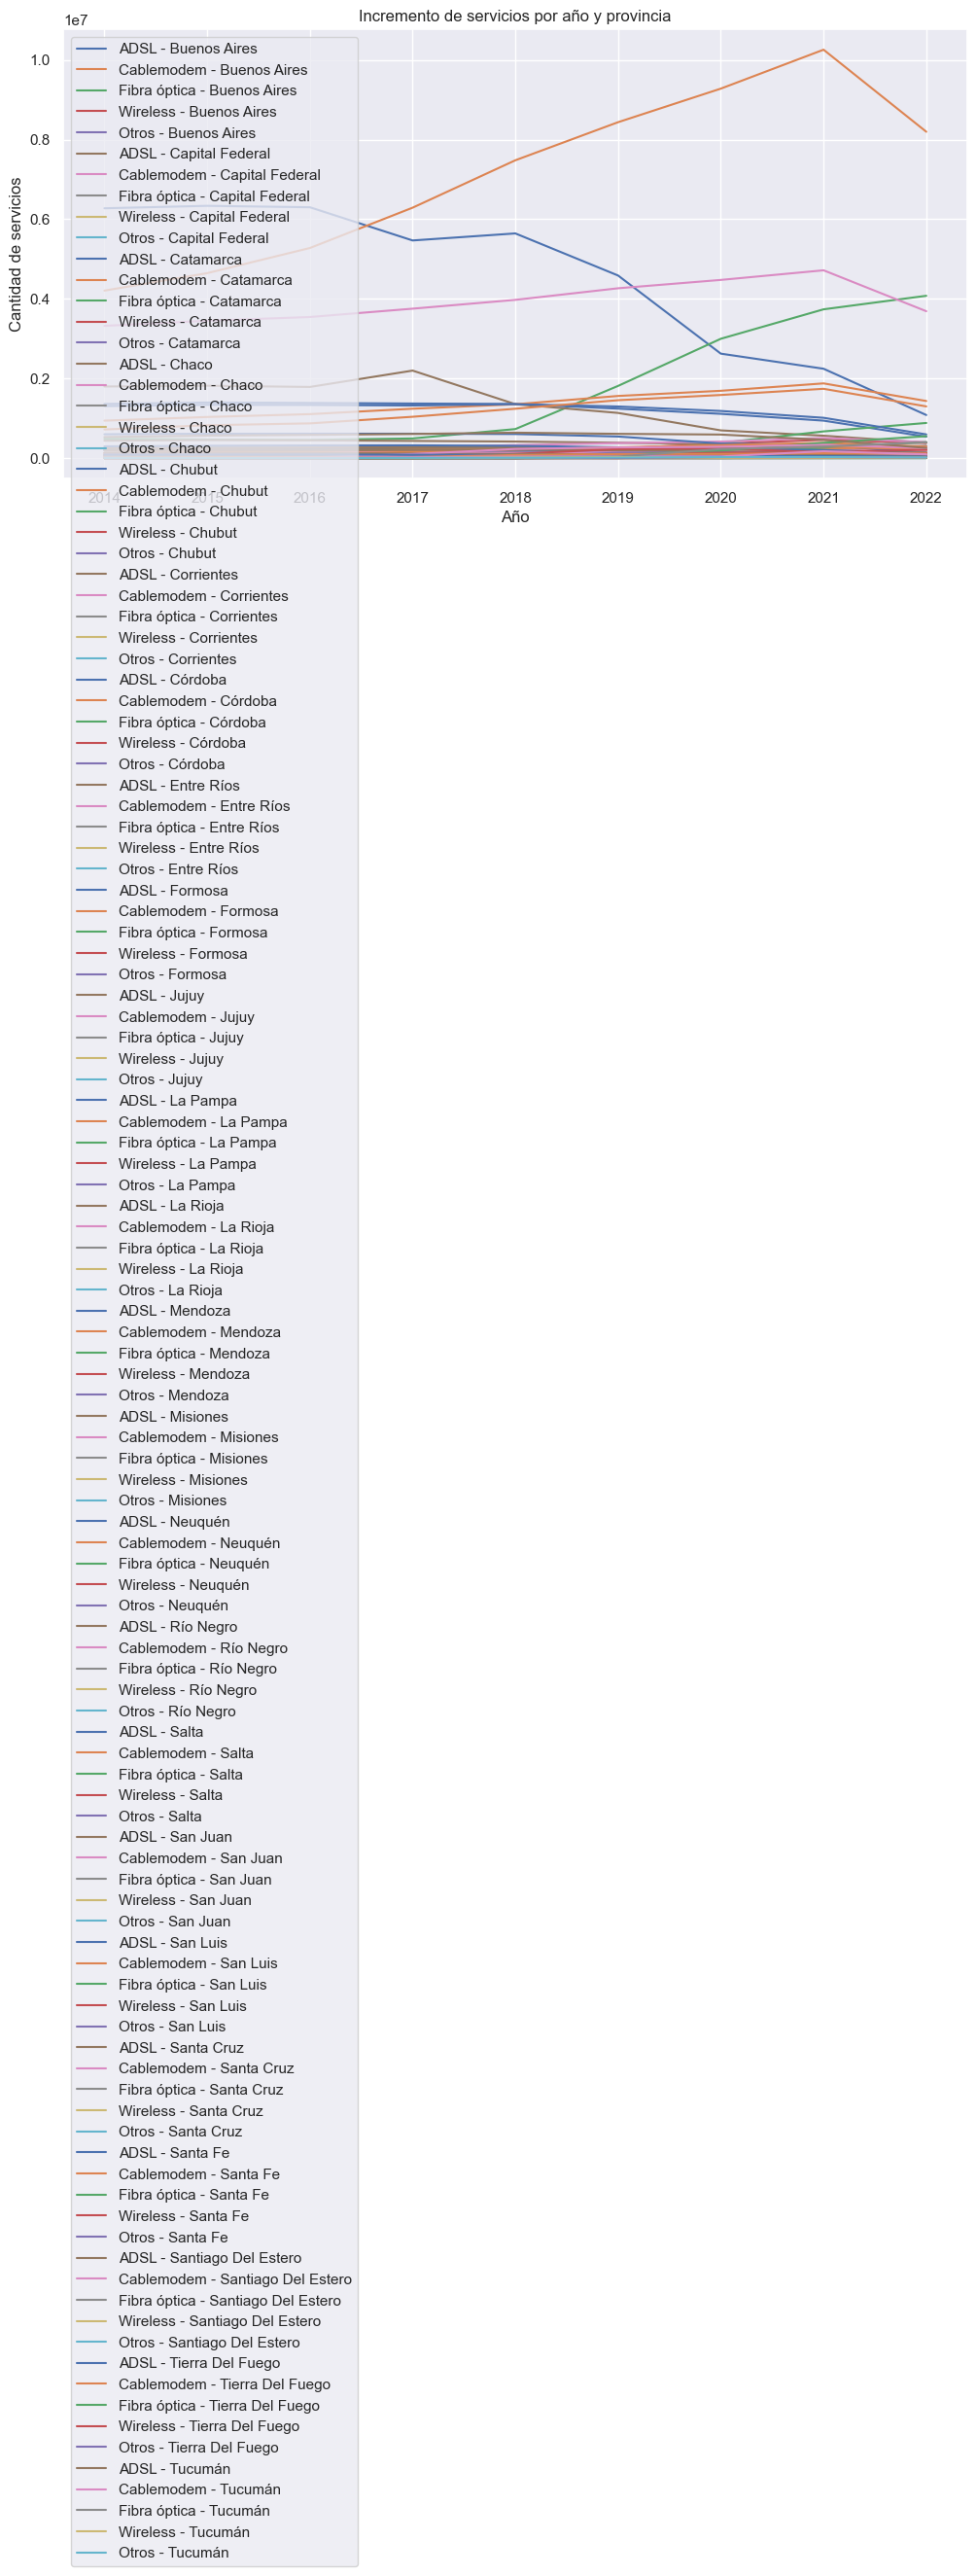

In [192]:
#filtramos las columnas de interés
columnas_interes = ['Año', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
data = acces_tech_dos[columnas_interes]

#Eliminamos las filas con valores nulos o NaN en la columna 'Año'
data = data.dropna(subset=['Año'])

#Agrupamos por 'Año' y 'Provincia' y calcular la suma de los servicios
data_grouped = data.groupby(['Año', 'Provincia']).sum().reset_index()

#Creamos la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

provincias = data_grouped['Provincia'].unique()

for provincia in provincias:
    data_provincia = data_grouped[data_grouped['Provincia'] == provincia]
    ax.plot(data_provincia['Año'], data_provincia['ADSL'], label=f'ADSL - {provincia}')
    ax.plot(data_provincia['Año'], data_provincia['Cablemodem'], label=f'Cablemodem - {provincia}')
    ax.plot(data_provincia['Año'], data_provincia['Fibra óptica'], label=f'Fibra óptica - {provincia}')
    ax.plot(data_provincia['Año'], data_provincia['Wireless'], label=f'Wireless - {provincia}')
    ax.plot(data_provincia['Año'], data_provincia['Otros'], label=f'Otros - {provincia}')

ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de servicios')
ax.set_title('Incremento de servicios por año y provincia')
ax.legend(loc='upper left')

#Mostramos el resultado
plt.show()

Esta gráfica es interesante, desgraciadamente por la forma en la que se acomodan los labels es complicado leerla, por tener muchos, nos da una idea pero no tan explícita como se quisiera.

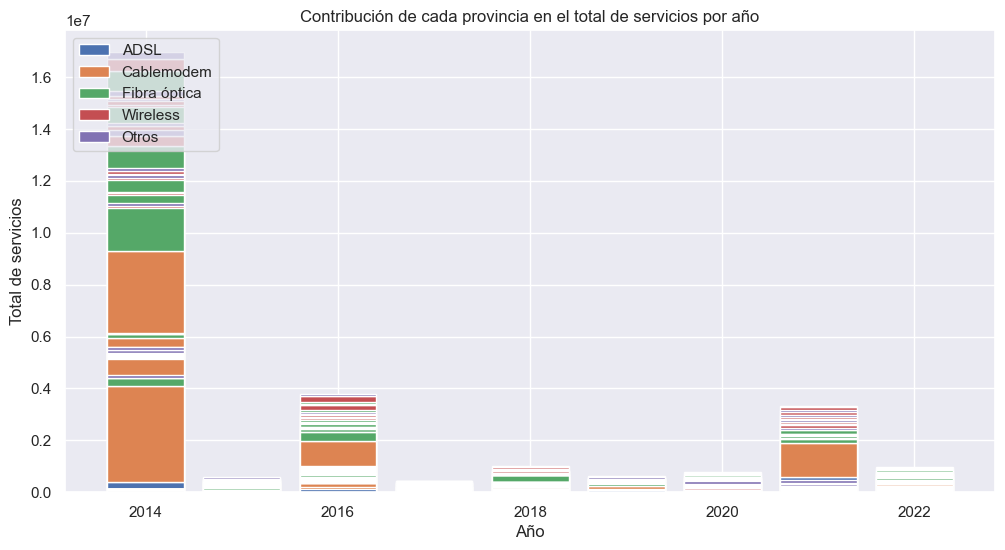

In [193]:
#Intentamos con otra gráfica

#Filtramos las columnas de interés
columnas_interes = ['Año', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
data = acces_tech_dos[columnas_interes]

#Eliminamos las filas con valores nulos o NaN en la columna 'Año'
data = data.dropna(subset=['Año'])

#Convertimos la columna 'Año' a tipo entero
data['Año'] = data['Año'].astype(int)

#Agrupamos por 'Año' y calcular la suma de los servicios para cada provincia
data_grouped = data.groupby(['Año', 'Provincia']).sum().reset_index()

#Obtenemos la lista de provincias
provincias = data_grouped['Provincia'].unique()

#Generamos el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 6))

#Creamos un diccionario para almacenar los datos de cada servicio por provincia
servicios = {
    'ADSL': [],
    'Cablemodem': [],
    'Fibra óptica': [],
    'Wireless': [],
    'Otros': []
}

#Obtenemos los datos de cada servicio por provincia y añadirlos al diccionario
for servicio in servicios.keys():
    datos_servicio = []
    for provincia in provincias:
        datos_provincia = data_grouped[data_grouped['Provincia'] == provincia]
        datos_servicio.extend(list(datos_provincia[servicio]))
    servicios[servicio] = datos_servicio

#Generamos las barras apiladas para cada servicio
ax.bar(data_grouped['Año'], servicios['ADSL'], label='ADSL')
ax.bar(data_grouped['Año'], servicios['Cablemodem'], bottom=servicios['ADSL'], label='Cablemodem')
ax.bar(data_grouped['Año'], servicios['Fibra óptica'], bottom=[sum(x) for x in zip(servicios['ADSL'], servicios['Cablemodem'])], label='Fibra óptica')
ax.bar(data_grouped['Año'], servicios['Wireless'], bottom=[sum(x) for x in zip(servicios['ADSL'], servicios['Cablemodem'], servicios['Fibra óptica'])], label='Wireless')
ax.bar(data_grouped['Año'], servicios['Otros'], bottom=[sum(x) for x in zip(servicios['ADSL'], servicios['Cablemodem'], servicios['Fibra óptica'], servicios['Wireless'])], label='Otros')

ax.set_xlabel('Año')
ax.set_ylabel('Total de servicios')
ax.set_title('Contribución de cada provincia en el total de servicios por año')
ax.legend(loc='upper left')

#Mostramos el resultado
plt.show()

Con esta nueva gráfica, tenemos un mejor orden, perono nos dice mucho tampoco por tener todas las provincias encimadas, entonces no nos funciona tampoco.

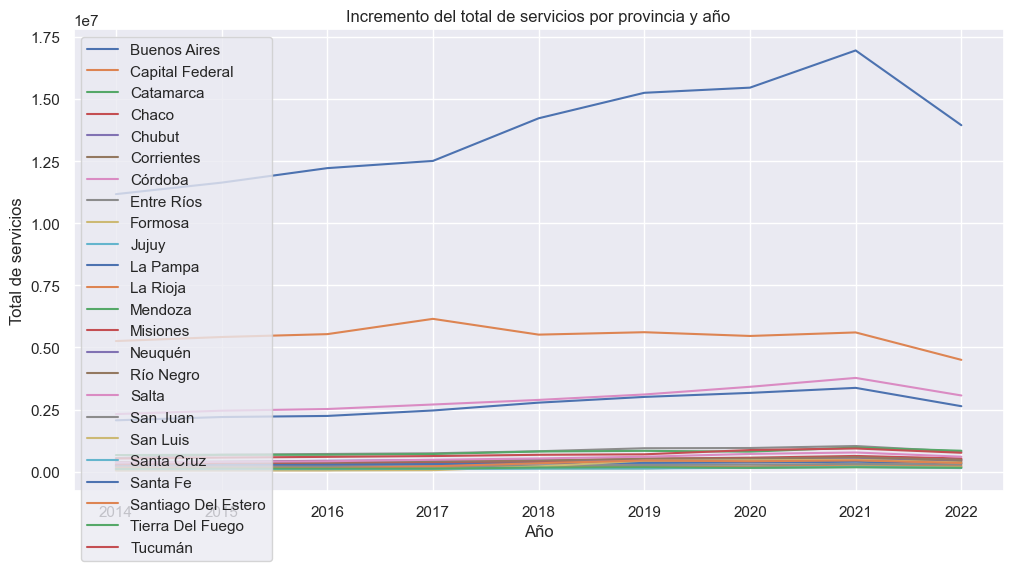

In [194]:
#Filtramos las columnas de interés
columnas_interes = ['Año', 'Provincia', 'Total']
data = acces_tech_dos[columnas_interes]

#Eliminamos las filas con valores nulos o NaN en la columna 'Año' o 'Total'
data = data.dropna(subset=['Año', 'Total'])

#Convertimos la columna 'Año' a tipo entero
data['Año'] = data['Año'].astype(int)

#Agrupamos por 'Año' y 'Provincia' y calcular el total de servicios
data_grouped = data.groupby(['Año', 'Provincia']).sum().reset_index()

#Obtenemos la lista de provincias
provincias = data_grouped['Provincia'].unique()

#Creamos un gráfico de línea para cada provincia
fig, ax = plt.subplots(figsize=(12, 6))

for provincia in provincias:
    datos_provincia = data_grouped[data_grouped['Provincia'] == provincia]
    ax.plot(datos_provincia['Año'], datos_provincia['Total'], label=provincia)

ax.set_xlabel('Año')
ax.set_ylabel('Total de servicios')
ax.set_title('Incremento del total de servicios por provincia y año')
ax.legend(loc='upper left')

#Mostramos
plt.show()

Aquí si vemos un poco mejor los datos, en este caso por provincia, y sale algo que no concuerda con lo demás, aquí Buenos Aires es quien tiene el mayor incremento de servicios, no es igual a Capital Federal como lo era en otra gráfica, pero creo es lo mismo.

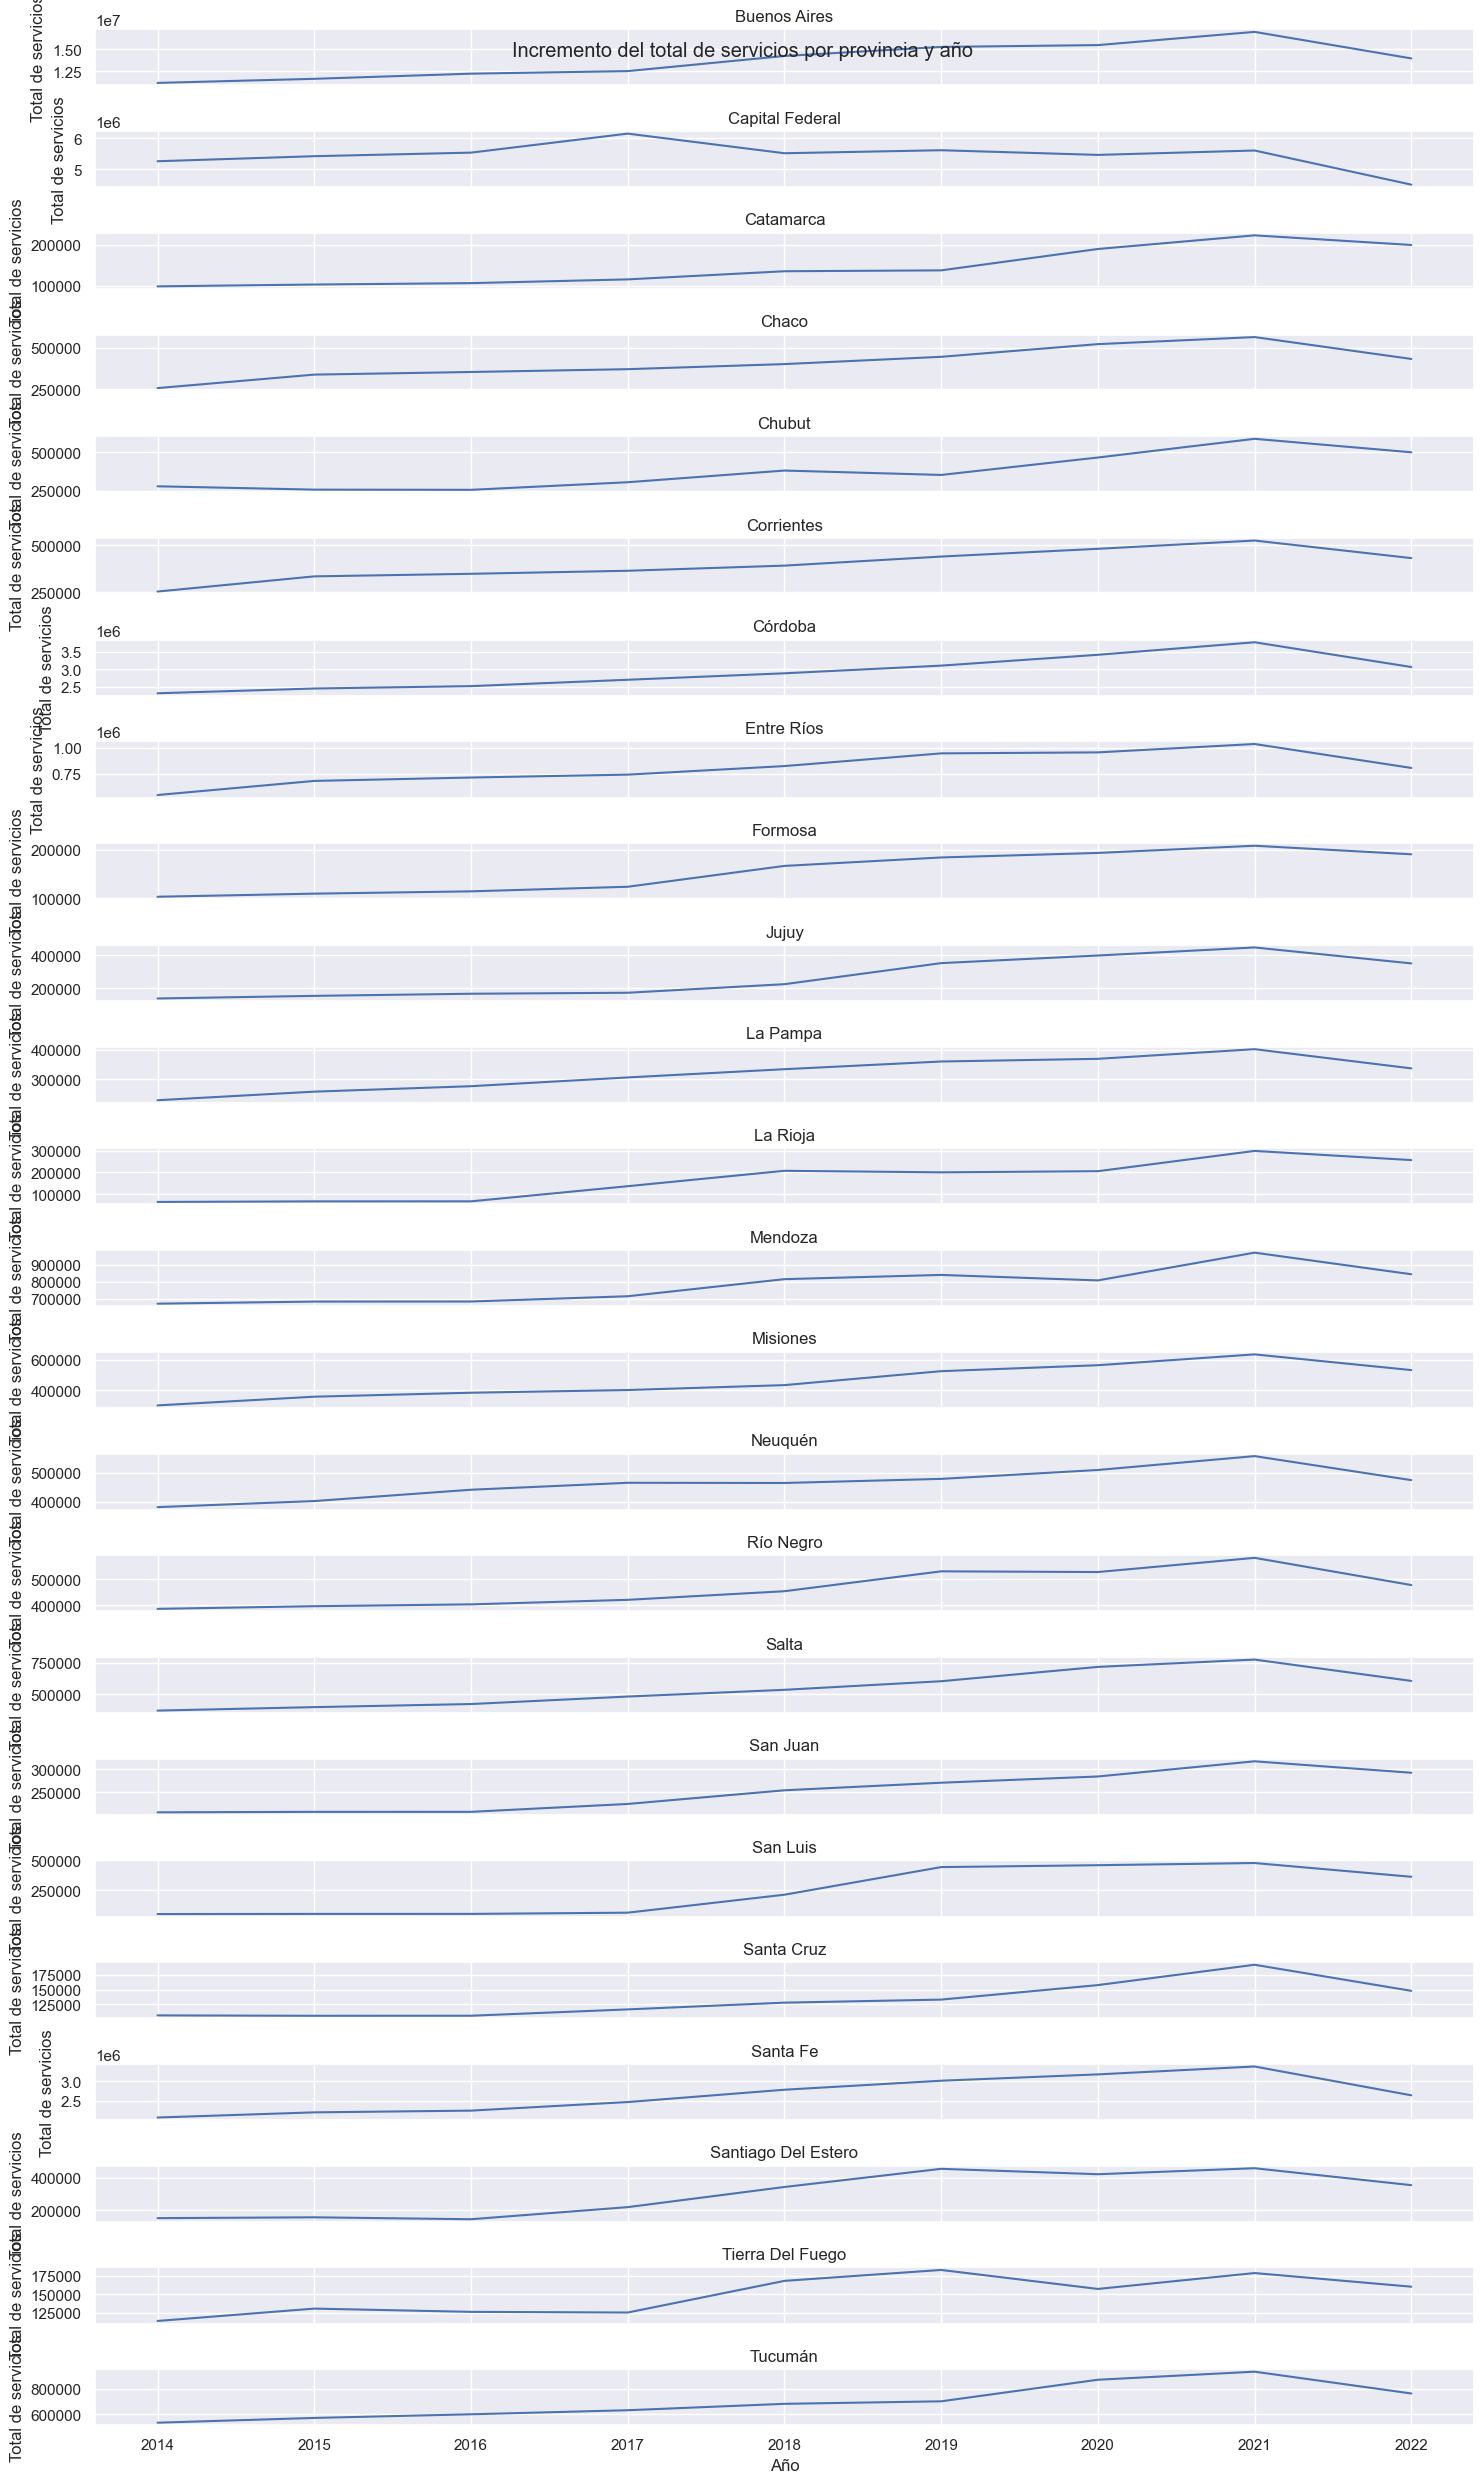

In [195]:
#Filtramos las columnas de interés
columnas_interes = ['Año', 'Provincia', 'Total']
data = acces_tech_dos[columnas_interes]

#Eliminamos las filas con valores nulos o NaN en la columna 'Año' o 'Total'
data = data.dropna(subset=['Año', 'Total'])

#Convertimos la columna 'Año' a tipo entero
data['Año'] = data['Año'].astype(int)

#Agrupamos por 'Año' y 'Provincia' y calcular el total de servicios
data_grouped = data.groupby(['Año', 'Provincia']).sum().reset_index()

#Obtenemos la lista de años y provincias
anios = data_grouped['Año'].unique()
provincias = data_grouped['Provincia'].unique()

#Creamos subgráficos para cada provincia
fig, axs = plt.subplots(len(provincias), figsize=(15, 25), sharex=True)

#Iteramos sobre las provincias y crear un gráfico de línea para cada una
for i, provincia in enumerate(provincias):
    datos_provincia = data_grouped[data_grouped['Provincia'] == provincia]
    axs[i].plot(datos_provincia['Año'], datos_provincia['Total'])
    axs[i].set_title(provincia)
    axs[i].set_ylabel('Total de servicios')

#Ajustamos las etiquetas del eje x en el último subgráfico
axs[-1].set_xlabel('Año')

#Ajustamos los espacios entre subgráficos
plt.tight_layout()

plt.suptitle('Incremento del total de servicios por provincia y año')

plt.show()

Este gráfico es interesante, nos muestra los incrmentos de los servicios en general, pero por el tamaño no se ve a simple vista cual ha sido su incremento tan bien.

In [196]:
acces_tech_dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           840 non-null    Int64  
 1   Trimestre     840 non-null    Int64  
 2   Provincia     840 non-null    string 
 3   ADSL          840 non-null    float64
 4   Cablemodem    840 non-null    float64
 5   Fibra óptica  840 non-null    float64
 6   Wireless      841 non-null    int64  
 7   Otros         841 non-null    int64  
 8   Total         840 non-null    float64
dtypes: Int64(2), float64(4), int64(2), string(1)
memory usage: 60.9 KB


In [197]:
acces_tech_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int64 
 3   Cablemodem    35 non-null     int64 
 4   Fibra óptica  35 non-null     int64 
 5   Wireless      35 non-null     int64 
 6   Otros         35 non-null     int64 
 7   Total         35 non-null     int64 
 8   Periodo       35 non-null     string
dtypes: int64(8), string(1)
memory usage: 2.6 KB


Como se mencionó anteriormente, se analizaba la opción de que se tomara o no en cuenta este dataset con 35 registros, y se llegó a la conclusión de que no, que solo sería tomado en cuenta el gráfico generado pero realmente usar algo más, no.

## Continuamos con los datasets: Internet_Accesos_por_velocidad

## Dataset 1

In [198]:
int_acc_velo_uno = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_Accesos-por-velocidad.csv')

In [199]:
int_acc_velo_uno.head()

Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps   
0  2022          3          33.013                   96.727  \
1  2022          2          33.667                   99.498   
2  2022          1          34.890                  104.840   
3  2021          4          41.262                   28.521   
4  2021          3          40.174                   41.437   

  Entre 1 Mbps y 6 Mbps Entre 6 Mbps y 10 Mbps Entre 10 Mbps y 20 Mbps   
0             1.161.370              1.151.906                 823.505  \
1             1.193.090              1.197.030                 856.562   
2             1.263.273              1.209.148                 967.508   
3             1.413.208              1.245.333                 976.539   
4             2.550.229              1.095.772                 710.122   

  Entre 20 Mbps y 30 Mbps Más de 30 Mbps    OTROS       Total  Unnamed: 11  
0                 479.822      6.995.750  349.035  11.091.128          NaN  
1                 485.321      6.741.922  351.594  10.958.684          NaN  
2                 509.830      6.336.187  198.333  10.624.009          NaN  
3                 558.358      6.032.322  194.251  10.489.794          NaN  
4                 536.364      4.948.174  163.269  10.085.541          NaN

In [200]:
int_acc_velo_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   35 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  35 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  35 non-null     object 
 8   Más de 30 Mbps           35 non-null     object 
 9   OTROS                    35 non-null     float64
 10  Total                    35 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.4+ KB


Al igual que en los otros casos, este dataset con solo 35 registros no se tomará en cuenta para el EDA

In [400]:
# Reemplazar los valores NaN por cero
#int_acc_velo_uno['Hasta 512 kbps '] = int_acc_velo_uno['Hasta 512 kbps '].fillna(0)

# Eliminar el punto decimal de los valores en la columna 'Wireless'
int_acc_velo_uno['Hasta 512 kbps'] = int_acc_velo_uno['Hasta 512 kbps'].astype(str).str.replace('\.', '', regex=True).astype(int)

## Dataset 2

In [201]:
int_acc_velo_dos = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_Accesos-por-velocidad (1).csv')

In [202]:
int_acc_velo_dos.head()

Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps   
0  2022          3          33.013                   96.727  \
1  2022          2          33.667                   99.498   
2  2022          1          34.890                  104.840   
3  2021          4          41.262                   28.521   
4  2021          3          40.174                   41.437   

  Entre 1 Mbps y 6 Mbps Entre 6 Mbps y 10 Mbps Entre 10 Mbps y 20 Mbps   
0             1.161.370              1.151.906                 823.505  \
1             1.193.090              1.197.030                 856.562   
2             1.263.273              1.209.148                 967.508   
3             1.413.208              1.245.333                 976.539   
4             2.550.229              1.095.772                 710.122   

  Entre 20 Mbps y 30 Mbps Más de 30 Mbps    OTROS       Total  Unnamed: 11  
0                 479.822      6.995.750  349.035  11.091.128          NaN  
1                 485.321      6.741.922  351.594  10.958.684          NaN  
2                 509.830      6.336.187  198.333  10.624.009          NaN  
3                 558.358      6.032.322  194.251  10.489.794          NaN  
4                 536.364      4.948.174  163.269  10.085.541          NaN

In [203]:
int_acc_velo_dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   35 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  35 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  35 non-null     object 
 8   Más de 30 Mbps           35 non-null     object 
 9   OTROS                    35 non-null     float64
 10  Total                    35 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.4+ KB


Al igual que el anterior tiene solo 35 registros, así que tampoco se tomará en cuenta, se analizará si uniendo estos dos podemos tener un poco más de información.

In [273]:
#Unificamos
int_acc_velo_juntos_1_2 = pd.concat([int_acc_velo_uno, int_acc_velo_dos])

In [274]:
int_acc_velo_juntos_1_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      70 non-null     int64  
 1   Trimestre                70 non-null     int64  
 2   Hasta 512 kbps           70 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  70 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    70 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   70 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  70 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  70 non-null     object 
 8   Más de 30 Mbps           70 non-null     object 
 9   OTROS                    70 non-null     float64
 10  Total                    70 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 7.1+ KB


In [291]:
#Guardamos ese archivo unificadoInternet_Accesos_por_velocidad_unificado_1_2.csv
int_acc_velo_juntos_1_2.to_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/')

In [275]:
int_acc_velo_juntos_1_2.head()

Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps   
0  2022          3          33.013                   96.727  \
1  2022          2          33.667                   99.498   
2  2022          1          34.890                  104.840   
3  2021          4          41.262                   28.521   
4  2021          3          40.174                   41.437   

  Entre 1 Mbps y 6 Mbps Entre 6 Mbps y 10 Mbps Entre 10 Mbps y 20 Mbps   
0             1.161.370              1.151.906                 823.505  \
1             1.193.090              1.197.030                 856.562   
2             1.263.273              1.209.148                 967.508   
3             1.413.208              1.245.333                 976.539   
4             2.550.229              1.095.772                 710.122   

  Entre 20 Mbps y 30 Mbps Más de 30 Mbps    OTROS       Total  Unnamed: 11  
0                 479.822      6.995.750  349.035  11.091.128          NaN  
1                 485.321      6.741.922  351.594  10.958.684          NaN  
2                 509.830      6.336.187  198.333  10.624.009          NaN  
3                 558.358      6.032.322  194.251  10.489.794          NaN  
4                 536.364      4.948.174  163.269  10.085.541          NaN

In [277]:
int_acc_velo_juntos_1_2.columns

Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total', 'Unnamed: 11'],
      dtype='object')

<Axes: >

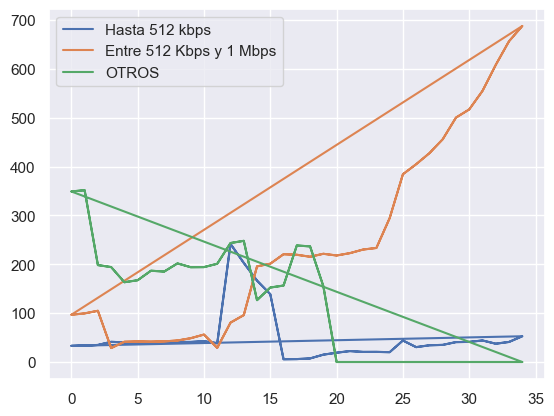

In [281]:
#Vemos entonces que podemos hacer
graf = int_acc_velo_juntos_1_2[['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps','Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps','Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps','OTROS']]
graf.plot()

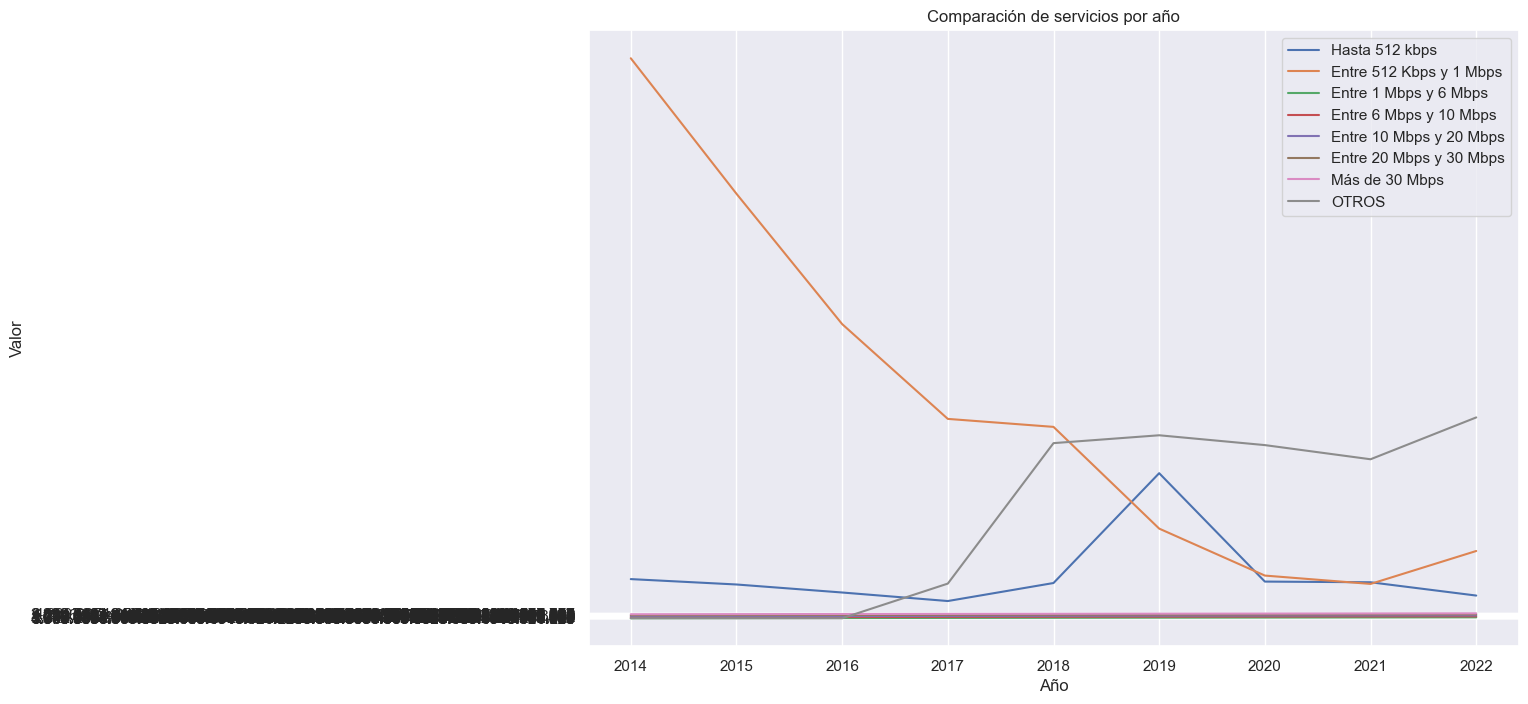

In [290]:
#Seleccionamos las columnas relevantes
columnas_comparar = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps','Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps','Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps','OTROS']

#Comparamos las columnas con la columna 'Año'
comparacion = int_acc_velo_juntos_1_2[columnas_comparar].groupby(int_acc_velo_juntos_1_2['Año']).sum()

#Creamos una figura y ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 8))

#Generamos una gráfica para cada columna a comparar
for columna in columnas_comparar:
    ax.plot(comparacion.index, comparacion[columna], label=columna)

#Configuramos los detalles de la gráfica
ax.set_xlabel('Año')
ax.set_ylabel('Valor')
ax.set_title('Comparación de servicios por año')
ax.legend()

#Mostramos la gráfica
plt.show()

No pude modificar la gráfica pero si la vemos de esta forma igualmente nos dice un poco a que se debe.

## Dataset 3

In [204]:
int_acc_velo_tres = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_Accesos-por-velocidad (2).csv')

In [205]:
int_acc_velo_tres.head()

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps   
0  2022          3     Buenos Aires          29.985               27.709  \
1  2022          3  Capital Federal         517.000                5.742   
2  2022          3        Catamarca          71.000              384.000   
3  2022          3            Chaco         461.000              987.000   
4  2022          3           Chubut         109.000                1.444   

  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps   
0           290.315             297.915              267.044  \
1            34.371              67.829               51.946   
2             3.107               5.389                5.099   
3            16.782              18.938                8.049   
4            45.707              30.940               34.682   

   + 20 Mbps - 30 Mbps  + 30 Mbps    OTROS      Total  
0              124.190  3.618.689   65.821  4.721.668  
1               28.692  1.253.105  105.477  1.547.679  
2                3.737     50.298    2.208     70.293  
3               15.828     79.390    3.711    144.146  
4               15.309     17.563   20.024    165.778

In [206]:
int_acc_velo_tres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


Como se ha hecho con todos los datasets hasta el momento, vemos como es que se tienen algunos con su tipo de dato diferente al contenido, entonces debemos solucionar eso

In [207]:
int_acc_velo_tres['Provincia'].head()

0       Buenos Aires
1    Capital Federal
2          Catamarca
3              Chaco
4             Chubut
Name: Provincia, dtype: object

In [208]:
#Cambiamos al tipo de dato correcto
int_acc_velo_tres['Provincia'] = int_acc_velo_tres['Provincia'].astype('string')

In [209]:
int_acc_velo_tres['Provincia'].head()

0       Buenos Aires
1    Capital Federal
2          Catamarca
3              Chaco
4             Chubut
Name: Provincia, dtype: string

In [210]:
int_acc_velo_tres['HASTA 512 kbps'] = int_acc_velo_tres['HASTA 512 kbps'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [211]:
int_acc_velo_tres['HASTA 512 kbps'].head()

0    29985
1     5170
2      710
3     4610
4     1090
Name: HASTA 512 kbps, dtype: int64

In [212]:
int_acc_velo_tres['+ 512 Kbps - 1 Mbps'] = int_acc_velo_tres['+ 512 Kbps - 1 Mbps'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [213]:
int_acc_velo_tres['+ 512 Kbps - 1 Mbps'].head()

0    27709
1     5742
2     3840
3     9870
4     1444
Name: + 512 Kbps - 1 Mbps, dtype: int64

In [214]:
int_acc_velo_tres['+ 1 Mbps - 6 Mbps'] = int_acc_velo_tres['+ 1 Mbps - 6 Mbps'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [215]:
int_acc_velo_tres['+ 1 Mbps - 6 Mbps'].head()

0    290315
1     34371
2      3107
3     16782
4     45707
Name: + 1 Mbps - 6 Mbps, dtype: int64

In [216]:
int_acc_velo_tres['+ 6 Mbps - 10 Mbps'] = int_acc_velo_tres['+ 6 Mbps - 10 Mbps'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [217]:
int_acc_velo_tres['+ 6 Mbps - 10 Mbps'].head()

0    297915
1     67829
2      5389
3     18938
4      3094
Name: + 6 Mbps - 10 Mbps, dtype: int64

In [218]:
int_acc_velo_tres['+ 10 Mbps - 20 Mbps'] = int_acc_velo_tres['+ 10 Mbps - 20 Mbps'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [219]:
int_acc_velo_tres['+ 10 Mbps - 20 Mbps'].head()

0    267044
1     51946
2      5099
3      8049
4     34682
Name: + 10 Mbps - 20 Mbps, dtype: int64

In [220]:
int_acc_velo_tres['+ 20 Mbps - 30 Mbps'] = int_acc_velo_tres['+ 20 Mbps - 30 Mbps'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [221]:
int_acc_velo_tres['+ 20 Mbps - 30 Mbps'].head()

0    12419
1    28692
2     3737
3    15828
4    15309
Name: + 20 Mbps - 30 Mbps, dtype: int64

In [222]:
int_acc_velo_tres['+ 30 Mbps'] = int_acc_velo_tres['+ 30 Mbps'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [223]:
int_acc_velo_tres['+ 30 Mbps'].head()

0    3618689
1    1253105
2      50298
3      79390
4      17563
Name: + 30 Mbps, dtype: int64

In [224]:
#Reemplazamos los valores NaN por cero
int_acc_velo_tres['OTROS'] = int_acc_velo_tres['OTROS'].fillna(0)
int_acc_velo_tres['OTROS'] = int_acc_velo_tres['OTROS'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [225]:
int_acc_velo_tres['OTROS'].head()

0     65821
1    105477
2      2208
3      3711
4     20024
Name: OTROS, dtype: int64

In [226]:
int_acc_velo_tres['Total'] = int_acc_velo_tres['Total'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [227]:
int_acc_velo_tres['Total'].head()

0    4721668
1    1547679
2      70293
3     144146
4     165778
Name: Total, dtype: int64

In [228]:
int_acc_velo_tres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  840 non-null    int64 
 1   Trimestre            840 non-null    int64 
 2   Provincia            840 non-null    string
 3   HASTA 512 kbps       840 non-null    int64 
 4   + 512 Kbps - 1 Mbps  840 non-null    int64 
 5   + 1 Mbps - 6 Mbps    840 non-null    int64 
 6   + 6 Mbps - 10 Mbps   840 non-null    int64 
 7   + 10 Mbps - 20 Mbps  840 non-null    int64 
 8   + 20 Mbps - 30 Mbps  840 non-null    int64 
 9   + 30 Mbps            840 non-null    int64 
 10  OTROS                840 non-null    int64 
 11  Total                840 non-null    int64 
dtypes: int64(11), string(1)
memory usage: 78.9 KB


In [229]:
int_acc_velo_tres.head()

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps   
0  2022          3     Buenos Aires           29985                27709  \
1  2022          3  Capital Federal            5170                 5742   
2  2022          3        Catamarca             710                 3840   
3  2022          3            Chaco            4610                 9870   
4  2022          3           Chubut            1090                 1444   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps   
0             290315              297915               267044  \
1              34371               67829                51946   
2               3107                5389                 5099   
3              16782               18938                 8049   
4              45707                3094                34682   

   + 20 Mbps - 30 Mbps  + 30 Mbps   OTROS    Total  
0                12419    3618689   65821  4721668  
1                28692    1253105  105477  1547679  
2                 3737      50298    2208    70293  
3                15828      79390    3711   144146  
4                15309      17563   20024   165778

In [230]:
#Guardamos el dataset limpio
int_acc_velo_tres.to_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/internet_accesos_x_velocidad.csv')

In [231]:
int_acc_velo_tres.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

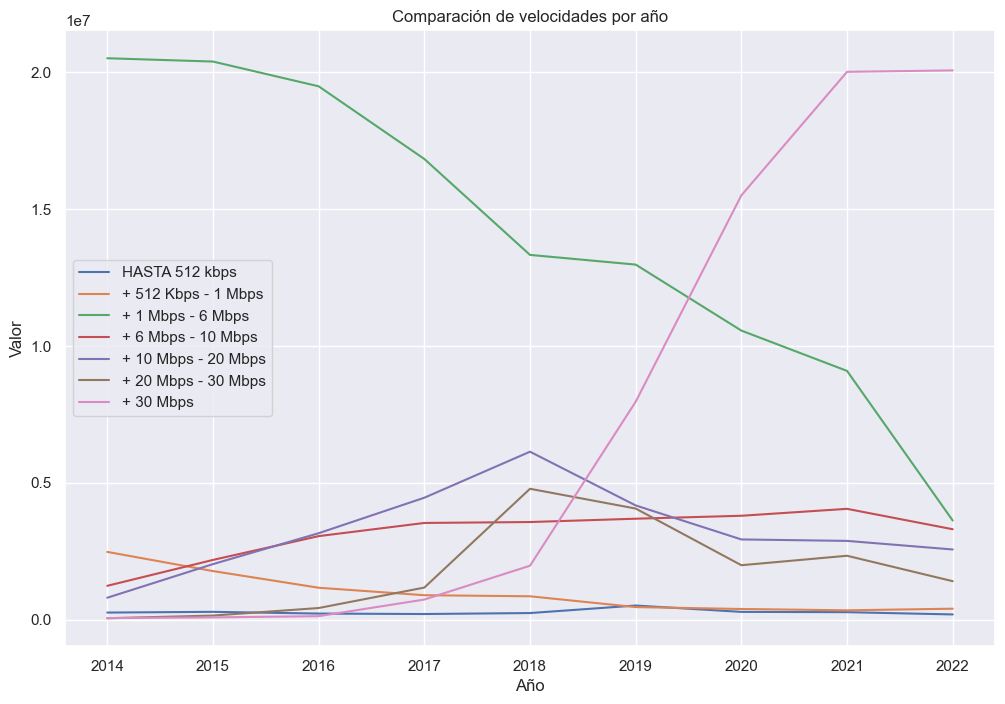

In [232]:
#Seleccionamos las columnas relevantes
columnas_comparar = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']

#Comparamos las columnas con la columna 'Año'
comparacion = int_acc_velo_tres[columnas_comparar].groupby(int_acc_velo_tres['Año']).sum()

#Creamos una figura y ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 8))

#Generamos una gráfica para cada columna a comparar
for columna in columnas_comparar:
    ax.plot(comparacion.index, comparacion[columna], label=columna)

#Configuramos los detalles de la gráfica
ax.set_xlabel('Año')
ax.set_ylabel('Valor')
ax.set_title('Comparación de velocidades por año')
ax.legend()

#Mostramos la gráfica
plt.show()

En este gráfico podemos ver las velocidades que se tienen desde 2014 hasta 2022, y vemos como es que antes la velocidad del internet era de un rango de 1 a 6 Mbps, imagina como era ver un video de YouTube, ahora, la velocidad más común es de 30 Mbps.

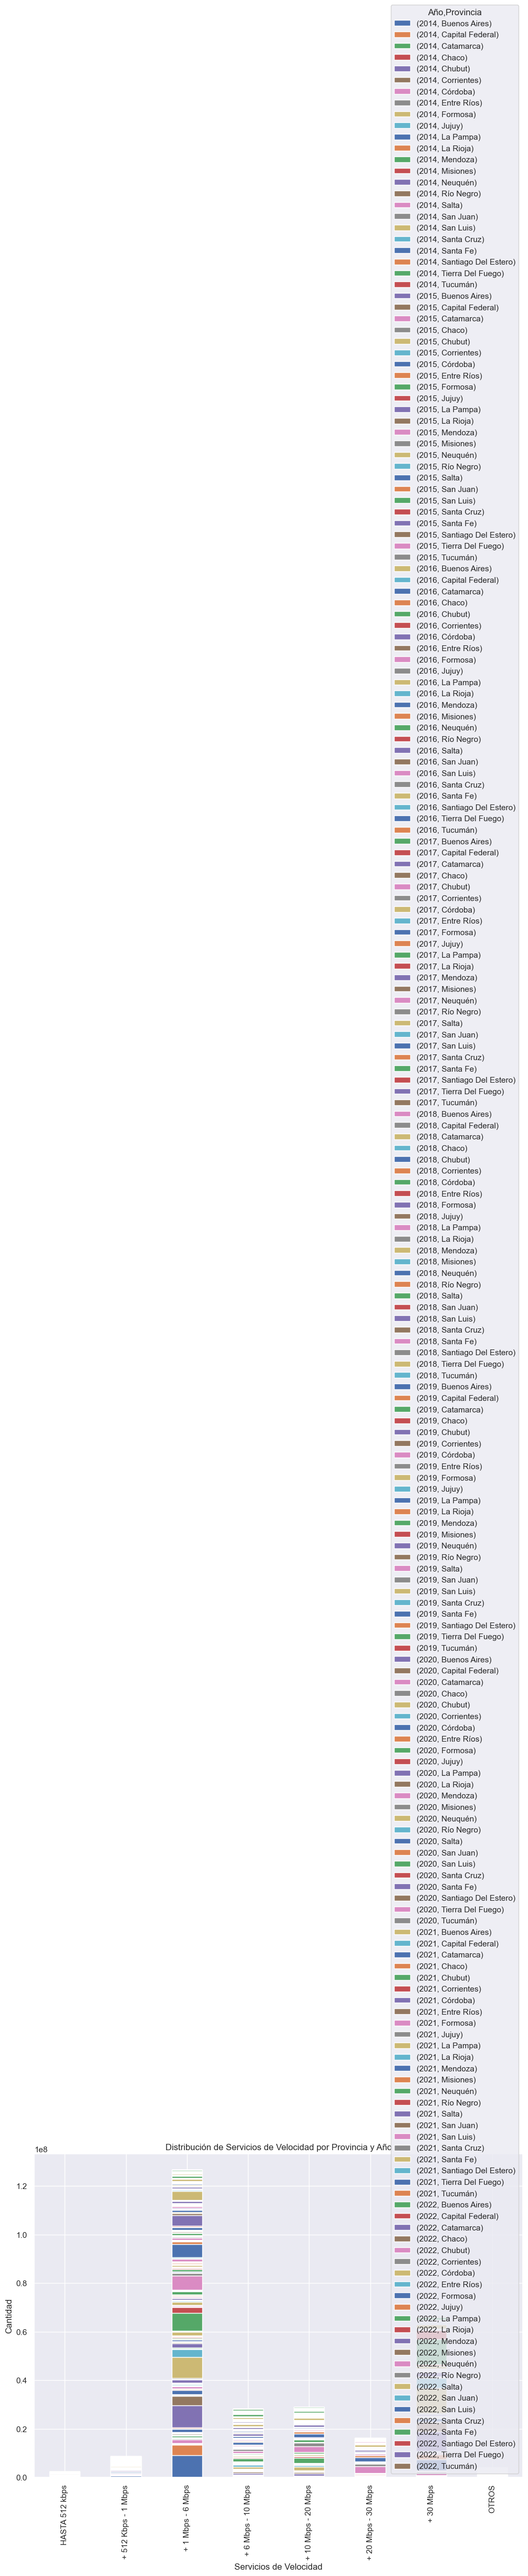

In [233]:
#Seleccionamos las columnas relevantes
columnas_servicios = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                      '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

#Agrupamos por 'Año' y 'Provincia' y sumar los valores de cada servicio
servicios_por_provincia = int_acc_velo_tres.groupby(['Año', 'Provincia'])[columnas_servicios].sum()

#Transponemos los datos para que los servicios sean las columnas
servicios_por_provincia = servicios_por_provincia.T

#Creamos una figura y ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 8))

#Generamos un gráfico de barras apiladas
servicios_por_provincia.plot(kind='bar', stacked=True, ax=ax)

#configuramos los detalles de la gráfica
ax.set_xlabel('Servicios de Velocidad')
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de Servicios de Velocidad por Provincia y Año')

#Mostramos la gráfica
plt.show()

No nos dice mucho, son bastantes datos para poder leer bien la información.

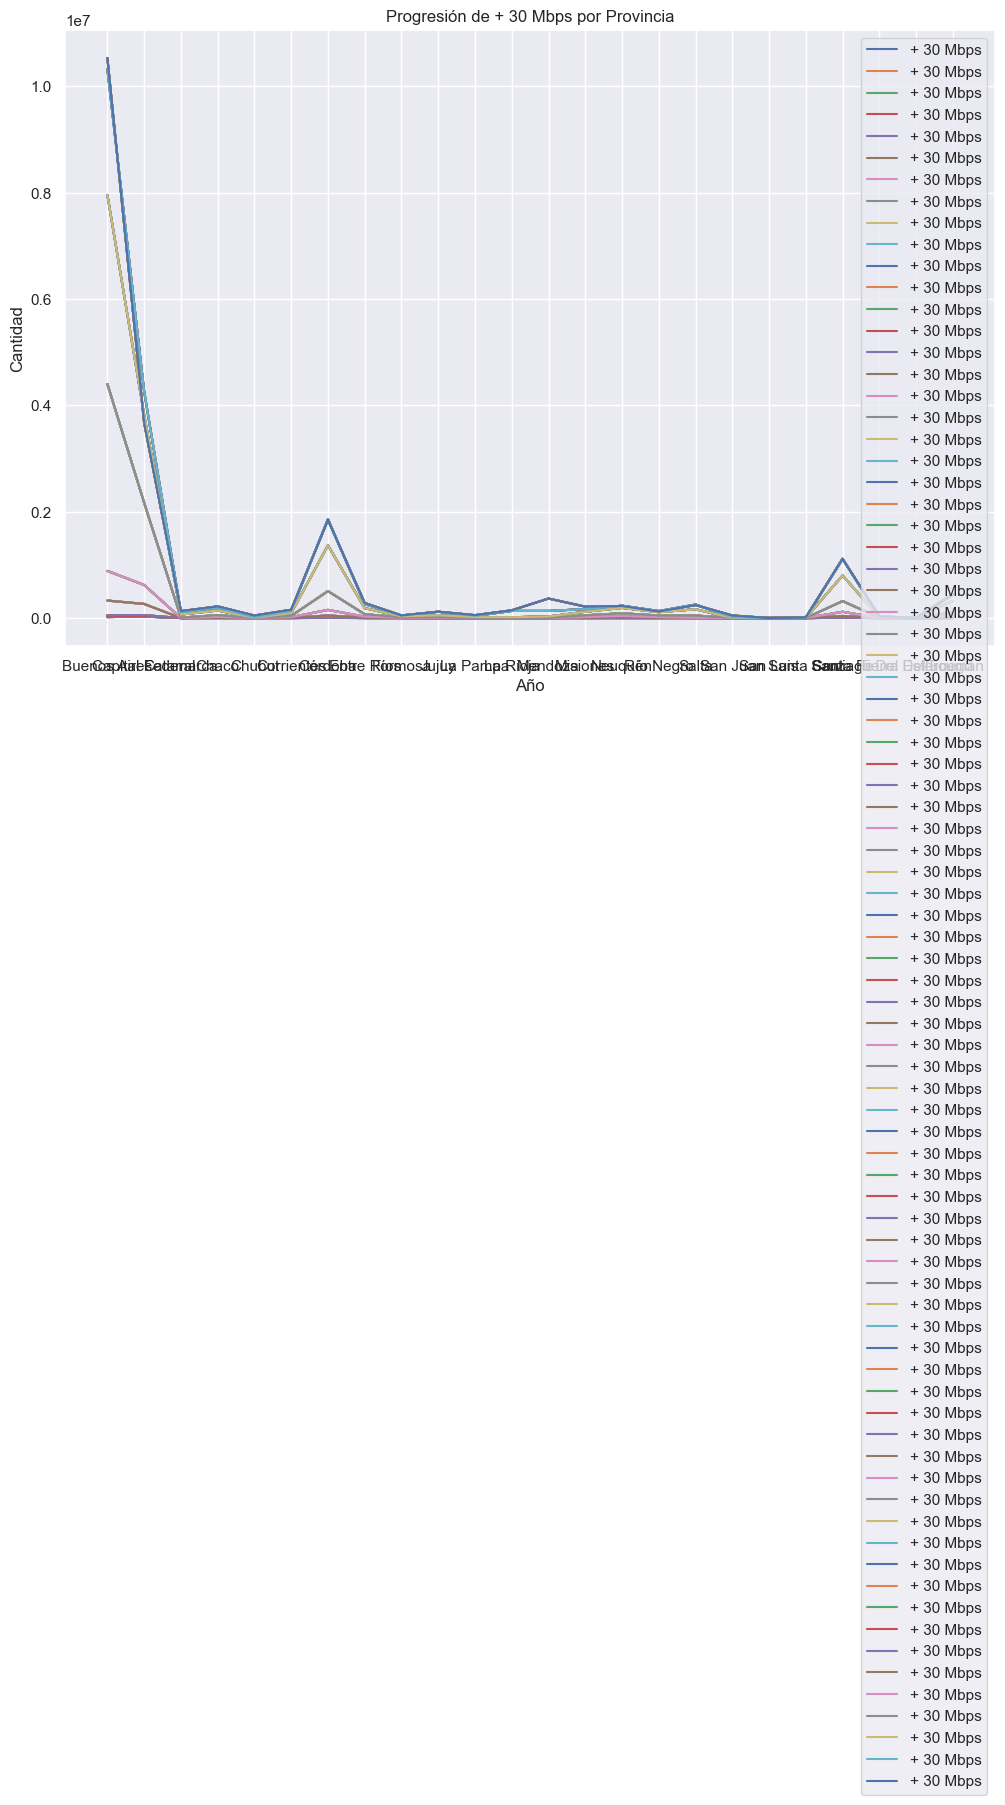

In [234]:
#Filtramos el dataFrame solo para la columna de interés
columna_interes = '+ 30 Mbps'
datos_interes = int_acc_velo_tres[['Año', 'Provincia', columna_interes]]

#Se agrupan los datos por 'Provincia' y ordenar por 'Año'
datos_agrupados = datos_interes.groupby(['Provincia', 'Año']).sum().unstack()

#Creamos una figura y ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 8))

#Generamos un gráfico de líneas para cada provincia
for provincia in datos_agrupados.columns.get_level_values(0):
    ax.plot(datos_agrupados.index, datos_agrupados[provincia], label=provincia)

#Configuramos los detalles de la gráfica
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.set_title(f'Progresión de {columna_interes} por Provincia')
ax.legend()

#Mostramos la gráfica
plt.show()

Al igual que la anterior, no dice mucho por la cantidad de datos que se tienen como referencia.

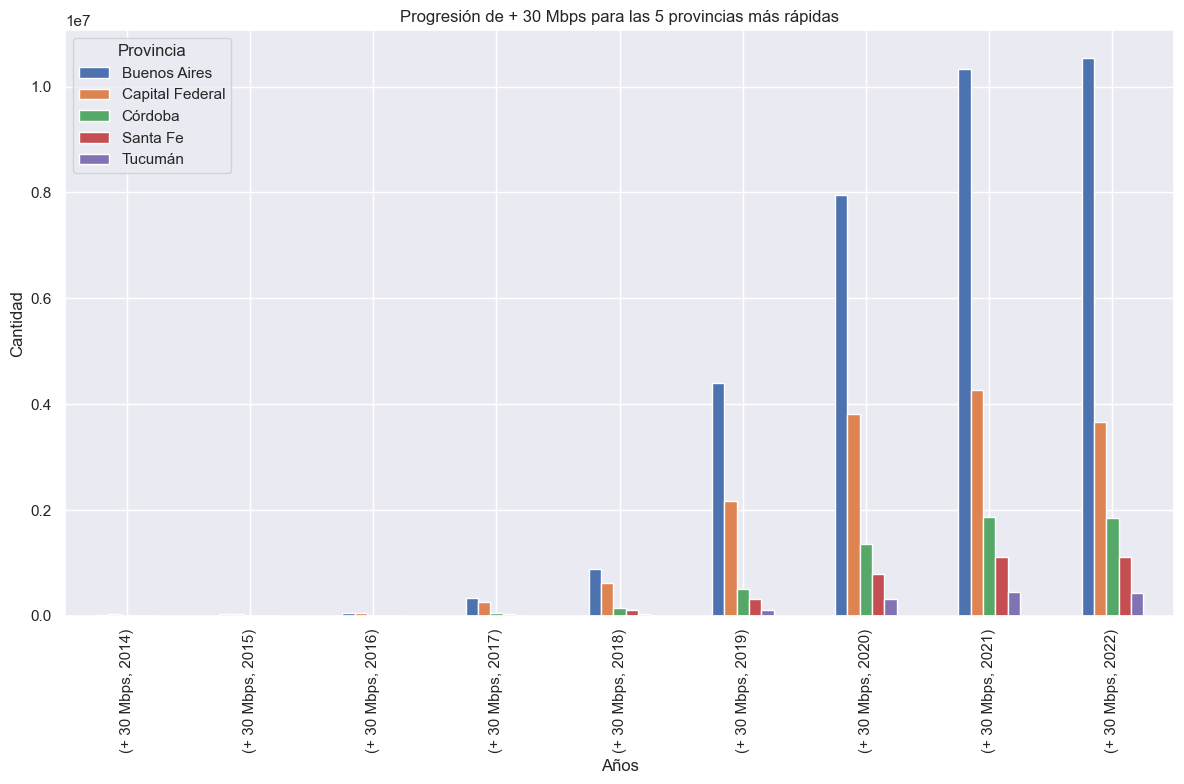

In [235]:
#Filtramos el DataFrame solo para la columna de interés
columna_interes = '+ 30 Mbps'
datos_interes = int_acc_velo_tres[['Año', 'Provincia', columna_interes]]

#Agrupamos los datos por 'Provincia' y 'Año' y ordenar por 'Año'
datos_agrupados = datos_interes.groupby(['Provincia', 'Año']).sum().unstack()

#Calculamos la suma total de '+ 30 Mbps' para cada provincia
suma_total = datos_agrupados.sum(axis=1)

#Ordenamos las provincias según la suma total en orden descendente
provincias_ordenadas = suma_total.sort_values(ascending=False).index

#Seleccionamos las primeras 5 provincias
provincias_top5 = provincias_ordenadas[:5]

#Filtramos los datos solo para las provincias seleccionadas
datos_top5 = datos_agrupados.loc[provincias_top5]

#Cambiamos el índice por el nombre de la provincia
datos_top5.index = datos_top5.index.get_level_values('Provincia')

#Transponemos los datos para tener los años como columnas
datos_top5 = datos_top5.transpose()

#Creamos una figura y ejes para la gráfica de barras
fig, ax = plt.subplots(figsize=(12, 8))

#Generamos el gráfico de barras para cada provincia
datos_top5.plot(kind='bar', ax=ax)

#configuramos los detalles de la gráfica
ax.set_xlabel('Años')
ax.set_ylabel('Cantidad')
ax.set_title(f'Progresión de {columna_interes} para las 5 provincias más rápidas')

#Mostramos la gráfica
plt.tight_layout()
plt.show()

Con este gráfico vemos en que momento las Provincias llegaron a tener esa velocidad de internet, solo se muestran las primeras 5 porque son muchos datos.

# Internet_BAF

In [236]:
baf = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_BAF.csv')

In [237]:
baf.head()

Año  Trimestre Banda ancha fija  Dial up       Total        Periodo
0  2022          3       11.078.691   12.437  11.091.128  Jul-Sept 2022
1  2022          2       10.946.248   12.436  10.958.684   Abr-Jun 2022
2  2022          1       10.611.390   12.619  10.624.009   Ene-Mar 2022
3  2021          4       10.476.933   12.861  10.489.794   Oct-Dic 2021
4  2021          3       10.075.184   10.357  10.085.541  Jul-Sept 2021

In [238]:
baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [239]:
baf['Banda ancha fija'] = baf['Banda ancha fija'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [240]:
baf['Banda ancha fija'].head()

0    11078691
1    10946248
2    10611390
3    10476933
4    10075184
Name: Banda ancha fija, dtype: int64

In [241]:
baf['Dial up'] = baf['Dial up'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [242]:
baf['Dial up'].head()

0    12437
1    12436
2    12619
3    12861
4    10357
Name: Dial up, dtype: int64

In [243]:
baf['Total'] = baf['Total'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [244]:
baf['Total'].head()

0    11091128
1    10958684
2    10624009
3    10489794
4    10085541
Name: Total, dtype: int64

In [245]:
baf['Periodo'] = baf['Periodo'].astype('string')

In [246]:
baf['Periodo'].head()

0    Jul-Sept 2022
1     Abr-Jun 2022
2     Ene-Mar 2022
3     Oct-Dic 2021
4    Jul-Sept 2021
Name: Periodo, dtype: string

In [247]:
baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               35 non-null     int64 
 1   Trimestre         35 non-null     int64 
 2   Banda ancha fija  35 non-null     int64 
 3   Dial up           35 non-null     int64 
 4   Total             35 non-null     int64 
 5   Periodo           35 non-null     string
dtypes: int64(5), string(1)
memory usage: 1.8 KB


No tiene caso manejar este dataset, no me había dado cuenta que tiene solo 35 datos, no se tomará en cuenta

<Axes: xlabel='Año', ylabel='Banda ancha fija'>

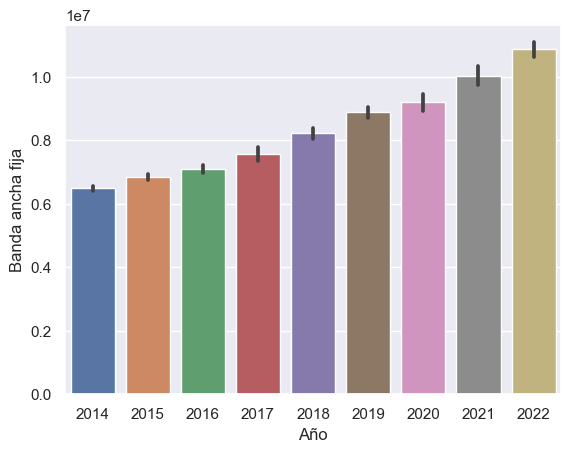

In [248]:
#Creamos la gráfica sencilla
sns.barplot(x = baf['Año'], y = baf['Banda ancha fija'])

Así vemos el incremento de la banda ancha fija por año.

# Internet_ingresos

In [249]:
int_ingresos = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_Ingresos.csv')

In [250]:
int_ingresos.head()

Año  Trimestre Ingresos (miles de pesos)        Periodo
0  2022          3                67.055.930  Jul-Sept 2022
1  2022          2                60.335.724   Abr-Jun 2022
2  2022          1                55.589.997   Ene-Mar 2022
3  2021          4                45.467.887   Oct-Dic 2021
4  2021          3                42.999.944  Jul-Sept 2021

In [251]:
int_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [252]:
int_ingresos['Ingresos (miles de pesos)'] = int_ingresos['Ingresos (miles de pesos)'].astype(str).str.replace('\.', '', regex=True).astype(int)

In [253]:
int_ingresos['Ingresos (miles de pesos)'].head()

0    67055930
1    60335724
2    55589997
3    45467887
4    42999944
Name: Ingresos (miles de pesos), dtype: int64

In [254]:
int_ingresos['Periodo'] = int_ingresos['Periodo'].astype('string')

In [255]:
int_ingresos['Periodo'].head()

0    Jul-Sept 2022
1     Abr-Jun 2022
2     Ene-Mar 2022
3     Oct-Dic 2021
4    Jul-Sept 2021
Name: Periodo, dtype: string

In [256]:
int_ingresos.head()

Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2022          3                   67055930  Jul-Sept 2022
1  2022          2                   60335724   Abr-Jun 2022
2  2022          1                   55589997   Ene-Mar 2022
3  2021          4                   45467887   Oct-Dic 2021
4  2021          3                   42999944  Jul-Sept 2021

In [257]:
#Guardamos las modificaciones hechas en un archivo
int_ingresos.to_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_Ingresos_limpio.csv')

<Axes: >

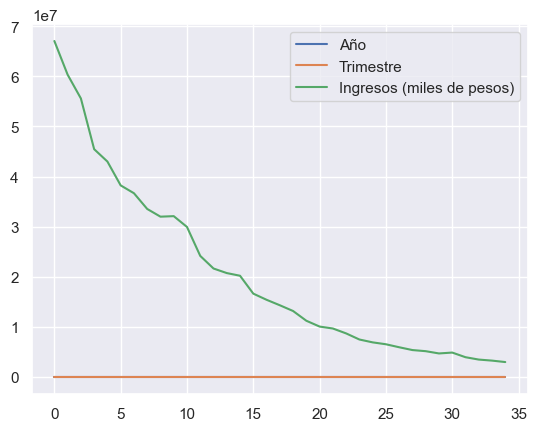

In [258]:
#Graficamos de forma sencilla
int_ingresos.plot()

EL gráfico no nos dice mucho, no se ven todos los datos.

<Axes: xlabel='Año', ylabel='Ingresos (miles de pesos)'>

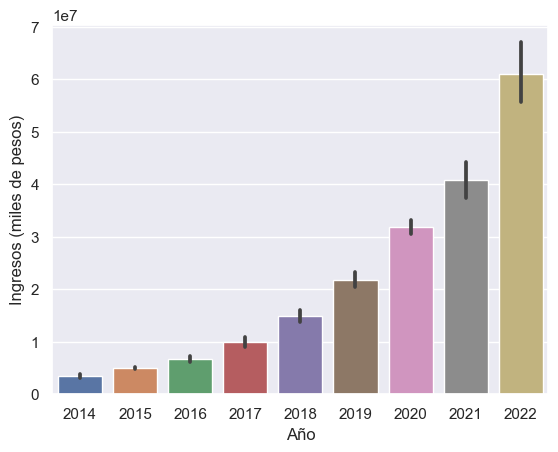

In [259]:
#Realizamos un gráfico
sns.barplot(x = int_ingresos['Año'], y = int_ingresos['Ingresos (miles de pesos)'])

Al ver la gráfica, podemos ver el enorme incremento que se ha tenido desde 2014 hasta 2022, si vemos, no había sido tanto como de 2021 a 2022

<Axes: xlabel='Año', ylabel='Ingresos (miles de pesos)'>

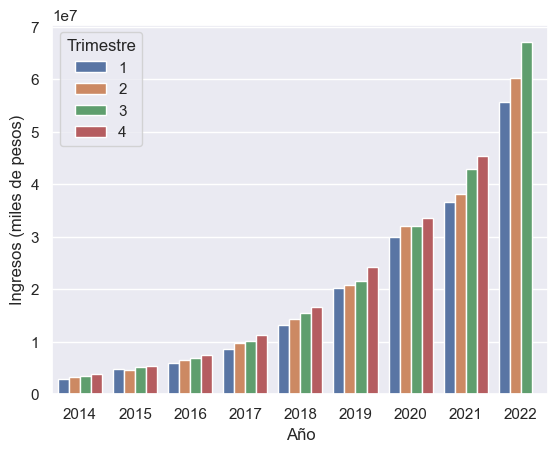

In [260]:
#Graficamos de nuevo
sns.barplot(x = int_ingresos['Año'], y = int_ingresos['Ingresos (miles de pesos)'], hue=int_ingresos['Trimestre'])

Con esta gráfica, vemos los incrementos por trimestre, es interesante ver los crecimientos que se han tenido por los periodos. Es interesante ver como siempre en el último trimestre se ve un incremento en comparación con los demás. Ver el comportamiento en general es interesante.

# Internet_penetracion

### Dataset 1

In [261]:
int_p_uno = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_Penetracion.csv')

In [262]:
int_p_uno.head()

Año  Trimestre        Provincia Accesos por cada 100 hogares
0  2022          3     Buenos Aires                        78,11
1  2022          3  Capital Federal                       122,28
2  2022          3        Catamarca                        65,33
3  2022          3            Chaco                        43,86
4  2022          3           Chubut                        84,38

In [263]:
int_p_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [264]:
int_p_uno['Provincia'] = int_p_uno['Provincia'].astype('string')

In [265]:
int_p_uno['Accesos por cada 100 hogares'] = int_p_uno['Accesos por cada 100 hogares'].astype(str).str.replace('\,', '', regex=True).astype(int)

In [266]:
int_p_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    string
 3   Accesos por cada 100 hogares  840 non-null    int64 
dtypes: int64(3), string(1)
memory usage: 26.4 KB


In [267]:
int_p_uno.head()

Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2022          3     Buenos Aires                          7811
1  2022          3  Capital Federal                         12228
2  2022          3        Catamarca                          6533
3  2022          3            Chaco                          4386
4  2022          3           Chubut                          8438

In [268]:
#Guardamos los cambios
int_p_uno.to_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_Penetracion_limpio.csv')

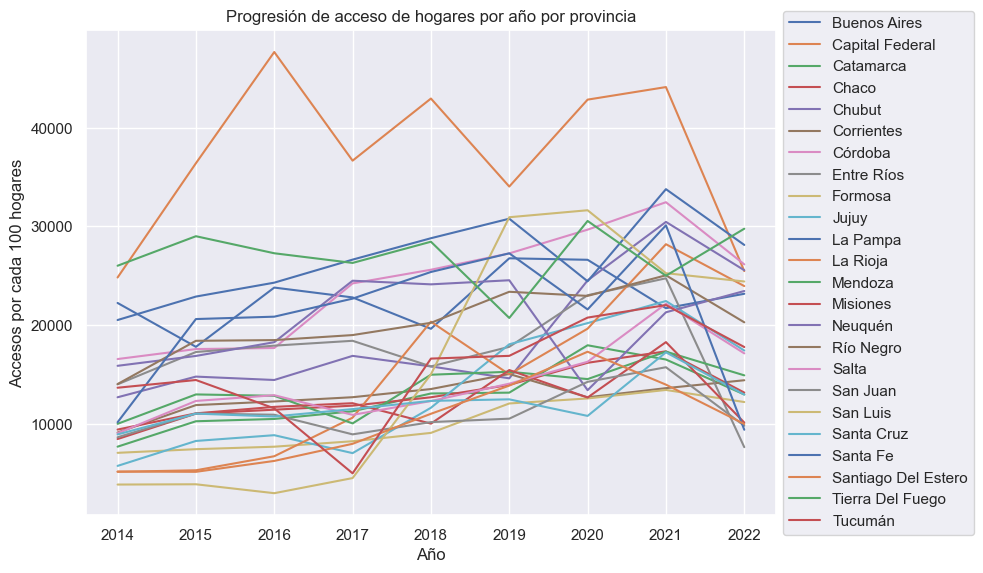

In [269]:
#Agrupamos parte de las columnas que contiene el dataset
accesos_por_provincia_y_anio = int_p_uno.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].sum().unstack()

#Creamos una figura y ejes para el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))

#Generamos el gráfico de líneas para cada provincia
for provincia in accesos_por_provincia_y_anio.columns:
    ax.plot(accesos_por_provincia_y_anio.index, accesos_por_provincia_y_anio[provincia], label=provincia)

#Configuramos los detalles de la gráfica
ax.set_xlabel('Año')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Progresión de acceso de hogares por año por provincia')

#Mostramos la leyenda en el lado derecho
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Ajustamos los márgenes para evitar recorte de la leyenda
plt.subplots_adjust(right=0.85)

#Mostramos la gráfica
plt.tight_layout()
plt.show()

Vemos en el gráfico cual ha sido la progresión que han tenido ls provincia por el acceso a internet, como vemos Capital Federal es quien más ha tenido incidencia en este punto. Esta gráfica nos ayuda mucho porque podemos ver un poco la parte de la penetración de mercado.

### Dataset 2

In [270]:
#Leemos los datos de un archivo
int_p_dos = pd.read_csv('/Volumes/KINGSTON/Henry/Proyecto 2/PI_DA/Datasets/Obligatorios/Internet_Penetracion (1).csv')

In [271]:
#Le damos un vistazo a los datos
int_p_dos.head()

Año  Trimestre Accesos por cada 100 hogares Accesos por cada 100 hab   
0  2022          3                        76,64                    23,95  \
1  2022          2                        75,97                    23,72   
2  2022          1                        73,88                    23,05   
3  2021          4                        73,18                    22,81   
4  2021          3                        70,58                    21,98   

         Periodo  
0  Jul-Sept 2022  
1   Abr-Jun 2022  
2   Ene-Mar 2022  
3   Oct-Dic 2021  
4  Jul-Sept 2021

In [272]:
#Vemos la información de los datos para conocer un poco más de ellos
int_p_dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


Como vemos, tiene muy pocos datos, así que igualmente lo pasaremos por alto, al no tener forma de hacer una concatenación, se ignorarán los datos.

<Axes: >

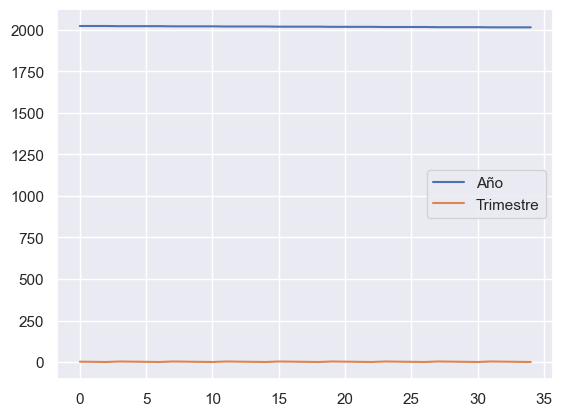

In [288]:
#Vemos una gráfica simple para ver si resulta algo
int_p_dos.plot()

<Axes: xlabel='Accesos por cada 100 hogares', ylabel='Año'>

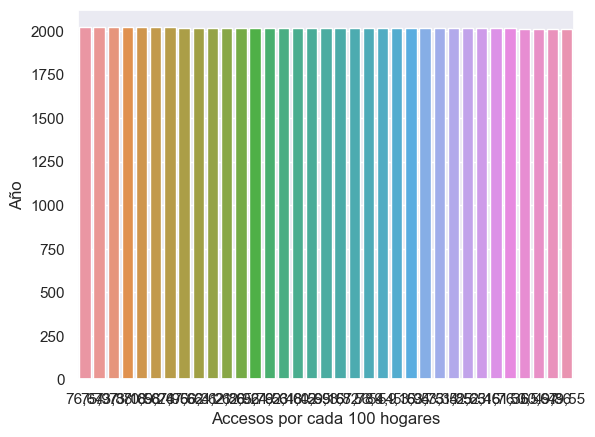

In [289]:
#Hacemos otro intento de crear una gráfica
sns.barplot(x = int_p_dos['Accesos por cada 100 hogares'], y = int_p_dos['Año'])

No nos fuciona como se ve esta gráfica.

Adicional a estos datasets, se tienen dos más, son: 
- ConectividadalserviciodeInternet
- AccesosaInternetFijoporVelocidaddeBajadayLocalidad

Pero se decidió que no se utilizarían porque los datos que contiene aparte de estár incompletos, no aportan tanto valor al análisis.